Notebook 2.1.
# Diagnostics_analysis

In this notebook you will find different process to research more about the 'diagnostico' column
of the dataframe 'hado_final'. This data was obtained from a database and it is used for analysing diagnostic information of patients in a medical center

In [109]:
# modulos y librerías

# pandas: Librería principal para análisis y manipulación de datos.
import pandas as pd

# numpy: Biblioteca para operaciones matemáticas y manipulación de matrices y arreglos.
import numpy as np

# matplotlib.pyplot: Herramienta de visualización para crear gráficos estáticos, animados e interactivos.
import matplotlib.pyplot as plt

# nltk: Biblioteca para trabajar con datos de lenguaje humano, incluye herramientas de tokenización, stemming, y más.
import nltk

# seaborn: Biblioteca de visualización basada en matplotlib que proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos.
import seaborn as sns

# sklearn: Biblioteca para aprendizaje automático y análisis de datos. 
from sklearn.feature_extraction.text import TfidfVectorizer  # Herramienta para convertir texto en vectores TF-IDF.
from sklearn.decomposition import PCA  # Análisis de componentes principales para reducción de dimensionalidad.
from sklearn.cluster import KMeans  # Algoritmo de clustering KMeans.
from sklearn.model_selection import train_test_split

# keras_preprocessing: Herramientas de preprocesamiento para redes neuronales, incluyendo padding para secuencias.
from keras_preprocessing.sequence import pad_sequences

# nltk.corpus: Herramientas y corpora adicionales de nltk.
from nltk.corpus import stopwords  # Lista de palabras vacías (stop words) en varios idiomas.

# gensim: Biblioteca para modelado de tópicos y vectorización de palabras, incluyendo Word2Vec.
from gensim.models import Word2Vec

# time: Módulo para trabajar con tiempos, útil para medir la duración de ejecuciones.
import time

# collections: Módulo que implementa tipos de contenedores especializados.
import collections

# plotly: Biblioteca de visualización interactiva.
import plotly.express as px
import plotly.graph_objects as go

# ydata_profiling: Herramienta para generar informes de perfilado de datos de manera rápida.
from ydata_profiling import ProfileReport

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import category_encoders as ce

In [3]:
%load_ext kedro.ipython

[10/23/23 17:08:57] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:139
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\hado.                                  
                             To set a different path, run '%reload_kedro <project_root>'                           

[10/23/23 17:08:58] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\framework\session\session.py:266: FutureWarning: ConfigLoader                  
                             will be deprecated in Kedro 0.19. Please use the OmegaConfigLoader                    
                             instead. To consult the documentation for OmegaConfigLoader, see here:                
                             https://docs.kedro.org/en/stable/configuration/advanced_configuration.                
                             html#omegaconfigloader                                                                
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \kedro\io\data_catalog.py:300: FutureWarning: Defining the 'layer'                    
                             attribute at the top level is deprecated and will be removed in Kedro                 
                             0.19.0. Please move 'layer' inside the 'metadata' -> 'kedro-viz'                      
                             attributes. See                                                                       
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    INFO     Kedro project hado                                                     __init__.py:108

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:109
                             'pipelines'                                                                           

[10/23/23 17:08:59] INFO     Registered line magic 'run_viz'                                        __init__.py:115

In [4]:
catalog.list('hado')


[
    'hado_22',
    'hado_21',
    'hado_20',
    'hado_19',
    'hado_18',
    'hado_17',
    'strip_lower_hado_17',
    'strip_lower_hado_18',
    'strip_lower_hado_19',
    'strip_lower_hado_20',
    'strip_lower_hado_21',
    'strip_lower_hado_22',
    'hado_concat',
    'hado_clean',
    'hado_clean_na',
    'hado_barthel_cleaned',
    'hado_ps_ecog_cleaned',
    'hado_gds_fast_cleaned',
    'hado_replaced_words',
    'hado_lat_lon',
    'hado_cleaned',
    'hado_cleaned_sedation',
    'hado_cleaned_medication',
    'hado_categorized',
    'hado_final',
    'hado_encoded'
]

In [5]:
df = catalog.load('hado_final')

[10/23/23 17:09:00] INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:492

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   h_procedencia               4013 non-null   object
 1   hospital_category           4013 non-null   object
 2   s_procedencia               4013 non-null   object
 3   procedencia_category        4013 non-null   object
 4   diagnostico                 4013 non-null   object
 5   diagnosis_category          4013 non-null   object
 6   motivo_ing                  4013 non-null   object
 7   ingreso_category            4013 non-null   object
 8   motivo_alta                 4013 non-null   object
 9   alta_category               4013 non-null   object
 10  fecha_alta                  4013 non-null   object
 11  ap                          4013 non-null   object
 12  n_estancias                 4013 non-null   int64 
 13  n_visitas                   4013 non-null   int6

In [7]:
df.head()

h_procedencia hospital_category s_procedencia procedencia_category  \
0   gil casares          Santiago          upal    Unidad Paliativos   
1       clinico          Santiago     oncologia            Oncologia   
2       clinico          Santiago           mir                  MIR   
3       clinico          Santiago     digestivo            Digestivo   
4       clinico          Santiago     urgencias            Urgencias   

                    diagnostico        diagnosis_category  \
0                    cancer orl     Canceres y neoplasias   
1               melanoma vulvar              Neurologicas   
2           cancer broncogenico     Canceres y neoplasias   
3             cirrosis hepatica  Hepaticas y pancreaticas   
4  neoplasia de mama estadio IV     Canceres y neoplasias   

                  motivo_ing ingreso_category   motivo_alta   alta_category  \
0           control sintomas         Sintomas     reingreso  Complicaciones   
1          mal control dolor         Sintomas        exitus          Exitus   
2          control evolutivo     Evaluaciones  fin cuidados           Otros   
3  administracion octreotido            Otros  fin cuidados           Otros   
4           control sintomas         Sintomas        exitus          Exitus   

   ... morfina midazolam  buscapina  haloperidol levomepromazina  \
0  ...       0         0          0            0               0   
1  ...       0         0          0            0               0   
2  ...       0         0          0            0               0   
3  ...       0         0          0            0               0   
4  ...       0         0          0            0               0   

         medico ayuntamiento  year     latitude    longitude  
0        valdes  desconocido  2017  desconocido  desconocido  
1   galego feal  desconocido  2017  desconocido  desconocido  
2  lopez renedo  desconocido  2017  desconocido  desconocido  
3  lopez renedo  desconocido  2017  desconocido  desconocido  
4  lopez renedo  desconocido  2017  desconocido  desconocido  

[5 rows x 55 columns]

# 1.Diagnostics Frecuency

In [8]:
diagnostic_counts = df['diagnostico'].value_counts()
print(diagnostic_counts)

ITU                                     173
infeccion respiratoria                  145
infeccion urinaria                      113
insuficiencia cardiaca                   73
cancer de colon                          70
                                       ... 
neoplasia mama traumatismo por caida      1
sobreinfeccion placas calcinosis          1
cancer oral                               1
infeccion abdominal                       1
neoplasia pulmon                          1
Name: diagnostico, Length: 1513, dtype: int64


In [9]:
df['diagnostico'].value_counts(normalize=True, sort=True, ascending=False, dropna=False)


ITU                                     0.043110
infeccion respiratoria                  0.036133
infeccion urinaria                      0.028158
insuficiencia cardiaca                  0.018191
cancer de colon                         0.017443
                                          ...   
neoplasia mama traumatismo por caida    0.000249
sobreinfeccion placas calcinosis        0.000249
cancer oral                             0.000249
infeccion abdominal                     0.000249
neoplasia pulmon                        0.000249
Name: diagnostico, Length: 1513, dtype: float64

# 2.Analysis of the most common diagnoses

In [10]:
top_diagnoses = diagnostic_counts.index[:3]  # Adjust the number according to your needs
for diagnosis in top_diagnoses:
    print(diagnosis,"\n", df[df['diagnostico'] == diagnosis].groupby('motivo_ing').size().sort_values(ascending=False), "\n")

ITU 
 motivo_ing
tratamiento antibiotico IV                     73
antibioterapia IV                              45
tratamiento                                     6
tratamiento antibiotico                         6
antibioterapia intravenosa                      4
tratamiento IV                                  4
valoracion                                      3
antibioterapia                                  2
control sintomas                                2
tratamiento antibiotico hospitalario            2
antibioterapia y control evolutivo              2
infeccion boca negativa ingesta                 1
tratamiento antibiotico intravenoso             1
tratamiento IV antibiotico                      1
tratamiento antibiotico y control evolutivo     1
tratamiento antibiotico y curas                 1
urocultivo de control                           1
taramiento qantibiotico IV                      1
seguimiento                                     1
facilitar medicacion hospitalaria

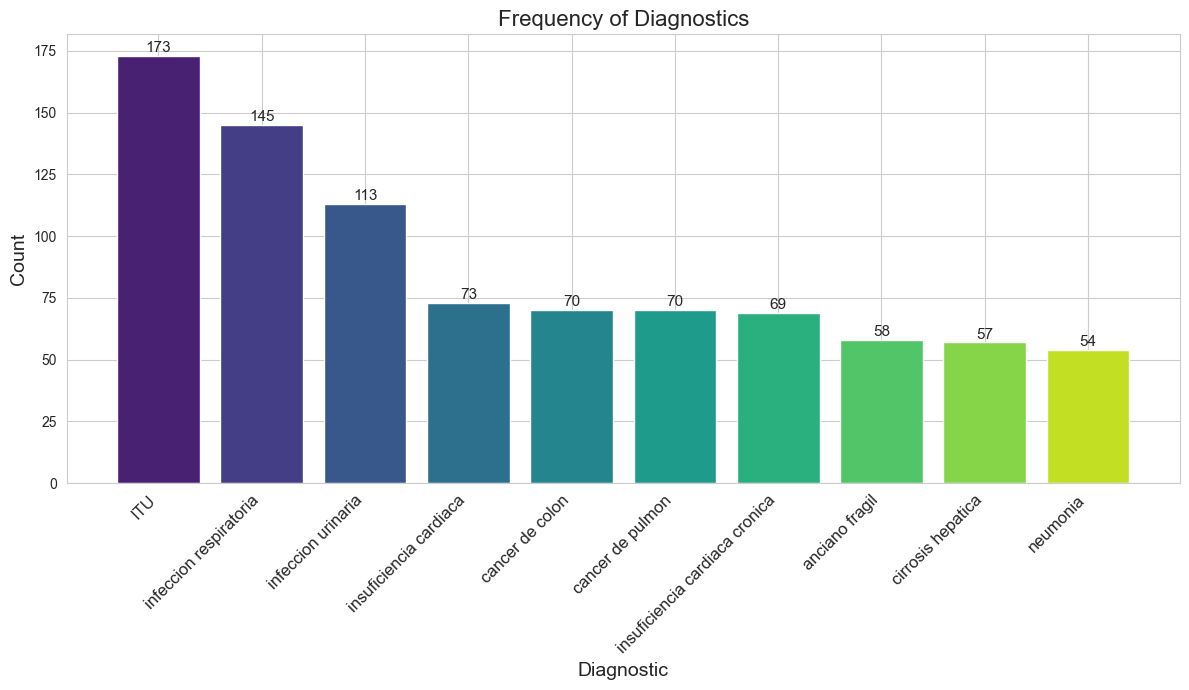

In [11]:
sns.set_style("whitegrid")

# Crear el plot
fig, ax = plt.subplots(figsize=(12,7))

# Obtener los primeros 10 diagnósticos y sus valores
top_diagnostics = diagnostic_counts.head(10)
bar_colors = sns.color_palette("viridis", len(top_diagnostics))

# Crear el gráfico de barras
bars = plt.bar(top_diagnostics.index, top_diagnostics.values, color=bar_colors)

# Rotar las etiquetas del eje x para mejor lectura
plt.xticks(rotation=45, ha="right", fontsize=12)

# Agregar valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            '%d' % int(height), ha='center', va='bottom', fontsize=11)

# Configurar etiquetas y título
plt.xlabel('Diagnostic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Frequency of Diagnostics', fontsize=16)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [12]:
top_diagnoses = diagnostic_counts.index[:3]  # Ajusta el número según tus necesidades
for diagnosis in top_diagnoses:
    print(diagnosis,"\n", df[df['diagnostico'] == diagnosis].groupby('motivo_alta').size().sort_values(ascending=False), "\n")

ITU 
 motivo_alta
fin cuidados    157
exitus           15
reingreso         1
dtype: int64 

infeccion respiratoria 
 motivo_alta
fin cuidados                      120
exitus                             17
reingreso                           2
ingreso en upal                     1
ingreso oncologia                   1
reingreso en neumologia             1
reingreso en upal                   1
traslado a urgencias                1
traslado a urgencias por covid      1
dtype: int64 

infeccion urinaria 
 motivo_alta
fin cuidados            107
exitus                    5
traslado a urgencias      1
dtype: int64 



In [13]:
top_diagnoses = diagnostic_counts.index[:5]  # Ajusta el número según tus necesidades
for diagnosis in top_diagnoses:
    print(diagnosis,"\n", df[df['diagnostico'] == diagnosis].groupby('ingreso_category').size().sort_values(ascending=False), "\n")

ITU 
 ingreso_category
Tratamientos    155
Evaluaciones      8
Otros             6
Sintomas          4
dtype: int64 

infeccion respiratoria 
 ingreso_category
Tratamientos    118
Evaluaciones     16
Otros             6
Sintomas          5
dtype: int64 

infeccion urinaria 
 ingreso_category
Tratamientos    104
Evaluaciones      7
Otros             1
Sintomas          1
dtype: int64 

insuficiencia cardiaca 
 ingreso_category
Otros           25
Evaluaciones    22
Sintomas        15
Tratamientos    11
dtype: int64 

cancer de colon 
 ingreso_category
Sintomas        40
Otros           15
Evaluaciones    14
Tratamientos     1
dtype: int64 



In [14]:
def display_top_diagnoses(df: pd.DataFrame, column: str, top_n=5):
    """
    Display the top diagnoses from a DataFrame and group them by 'ingreso_category'.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing diagnostic data.
    - column (list): The column from the DataFrame to groupby data.
    - top_n (int, optional): The number of top diagnoses to display. Defaults to 5.
    
    Returns:
    None. Prints the top diagnoses and their counts grouped by 'ingreso_category'.
    """
    
    # Assuming diagnostic_counts is calculated as the value counts of 'diagnostico' column
    diagnostic_counts = df['diagnostico'].value_counts()
    
    # Get the top diagnoses based on top_n
    top_diagnoses = diagnostic_counts.index[:top_n]
    
    # Loop through the top diagnoses and display the grouped counts
    for diagnosis in top_diagnoses:
        print(diagnosis, "\n", df[df['diagnostico'] == diagnosis].groupby(column).size().sort_values(ascending=False), "\n")

display_top_diagnoses(df, "ap")

ITU 
 ap
no    121
si     52
dtype: int64 

infeccion respiratoria 
 ap
no    116
si     29
dtype: int64 

infeccion urinaria 
 ap
no    77
si    36
dtype: int64 

insuficiencia cardiaca 
 ap
no    51
si    22
dtype: int64 

cancer de colon 
 ap
no    46
si    24
dtype: int64 



In [16]:
top_diagnoses = diagnostic_counts.index[:5]  # Adjust the number according to your needs
for diagnosis in top_diagnoses:
    for col in df:
        if col != 'diagnostico':
            print(f"---Top diagnosticos--- \n{top_diagnoses}\n{df[df['diagnostico'] == diagnosis].groupby(col).size().sort_values(ascending=False)}\n")
        else:
            continue

---Top diagnosticos--- 
Index(['ITU (infeccion del tracto urinario)', 'infeccion respiratoria',
       'infeccion urinaria', 'insuficiencia cardiaca', 'cancer de colon'],
      dtype='object')
h_procedencia
clinico        98
no             51
conxo          14
gil casares     8
chuac           1
dtype: int64

---Top diagnosticos--- 
Index(['ITU (infeccion del tracto urinario)', 'infeccion respiratoria',
       'infeccion urinaria', 'insuficiencia cardiaca', 'cancer de colon'],
      dtype='object')
hospital_category
Santiago    120
no           51
Otros         1
dtype: int64

---Top diagnosticos--- 
Index(['ITU (infeccion del tracto urinario)', 'infeccion respiratoria',
       'infeccion urinaria', 'insuficiencia cardiaca', 'cancer de colon'],
      dtype='object')
s_procedencia
urgencias           54
no                  51
mir                 43
nefrologia           8
urologia             5
reumatologia         3
mir provincial       2
upal                 2
cardiologia          1
he

In [15]:
def display_top_diagnoses_by_all_columns(df, top_n=5):
    """
    Display the top diagnoses from a DataFrame and group them by every column 
    except the 'diagnostico' column.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing diagnostic data.
    - top_n (int, optional): The number of top diagnoses to display. Defaults to 5.
    
    Returns:
    None. Prints the top diagnoses and their counts grouped by all other columns.
    """

    # Assuming diagnostic_counts is calculated as the value counts of 'diagnostico' column
    diagnostic_counts = df['diagnostico'].value_counts()
    
    # Get the top diagnoses based on top_n
    top_diagnoses = diagnostic_counts.index[:top_n]
    
    # Loop through the top diagnoses and display the grouped counts
    for diagnosis in top_diagnoses:
        for col in df.columns:
            if col != 'diagnostico':
                print(f"---Top diagnosticos--- \n{top_diagnoses}\n{df[df['diagnostico'] == diagnosis].groupby(col).size().sort_values(ascending=False)}\n")
            else:
                continue
            
display_top_diagnoses_by_all_columns(df, top_n=5)


---Top diagnosticos--- 
Index(['ITU', 'infeccion respiratoria', 'infeccion urinaria',
       'insuficiencia cardiaca', 'cancer de colon'],
      dtype='object')
h_procedencia
clinico        99
no             51
conxo          14
gil casares     8
chuac           1
dtype: int64

---Top diagnosticos--- 
Index(['ITU', 'infeccion respiratoria', 'infeccion urinaria',
       'insuficiencia cardiaca', 'cancer de colon'],
      dtype='object')
hospital_category
Santiago    121
no           51
Otros         1
dtype: int64

---Top diagnosticos--- 
Index(['ITU', 'infeccion respiratoria', 'infeccion urinaria',
       'insuficiencia cardiaca', 'cancer de colon'],
      dtype='object')
s_procedencia
urgencias           54
no                  51
mir                 43
nefrologia           8
urologia             5
reumatologia         3
cardiologia          2
mir provincial       2
upal                 2
hematologia          1
medicina interna     1
oncologia            1
dtype: int64

---Top diagnost

# 3.Visualisation of diagnoses

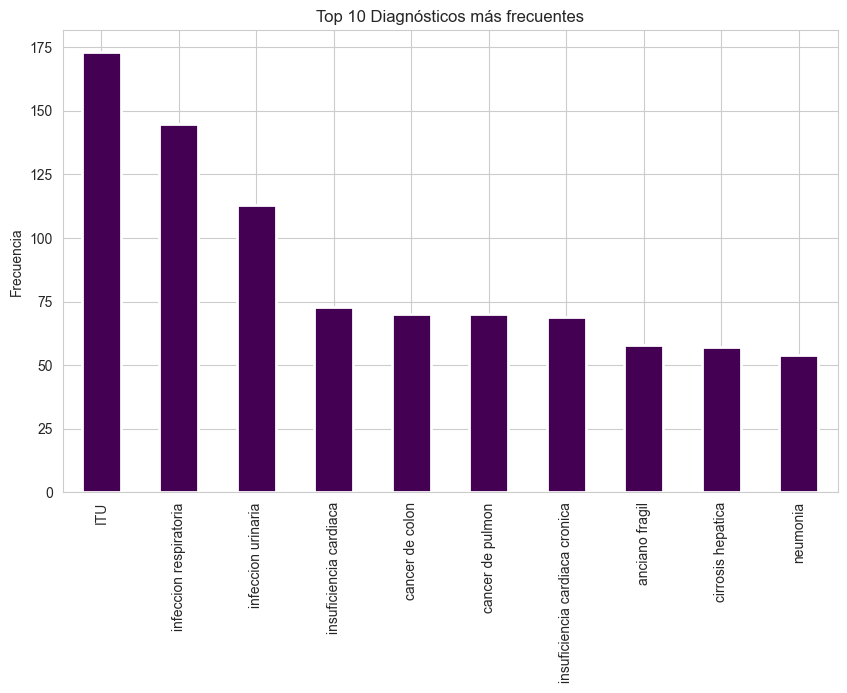

In [16]:
top_10_diagnostic_counts = diagnostic_counts[:10]  # Seleccionamos los 10 diagnósticos más comunes

fig, ax = plt.subplots(figsize=(10,6))
top_10_diagnostic_counts.plot(kind='bar',ax=ax, cmap='viridis', edgecolor='white', linewidth=2, )
ax.set_title('Top 10 Diagnósticos más frecuentes')
ax.set_ylabel('Frecuencia')
ax.tick_params(axis='x', rotation=90)
plt.show()

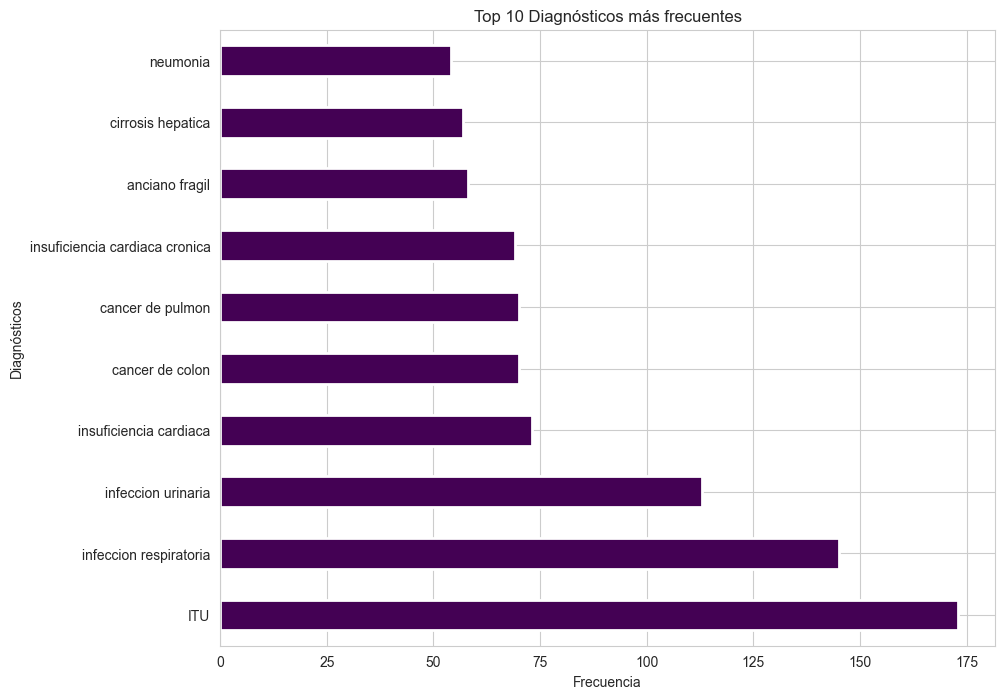

In [17]:
top_10_diagnostic_counts = diagnostic_counts[:10]  # Seleccionamos los 10 diagnósticos más comunes

fig, ax = plt.subplots(figsize=(10,8))

top_10_diagnostic_counts.plot(kind='barh',ax=ax, cmap='viridis', edgecolor='white', linewidth=2, fontsize= 10)
ax.set_title('Top 10 Diagnósticos más frecuentes')
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Diagnósticos')
plt.show()

In [18]:
def visualize_top_diagnoses_by_all_columns_plotly(df, top_n=5):
    """
    Visualize the top diagnoses from a DataFrame grouped by every column 
    except the 'diagnostico' column using interactive bar plots with Plotly.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing diagnostic data.
    - top_n (int, optional): The number of top diagnoses to visualize. Defaults to 5.
    
    Returns:
    None. Displays interactive bar plots for top diagnoses grouped by all other columns.
    """
    
    # Assuming diagnostic_counts is calculated as the value counts of 'diagnostico' column
    diagnostic_counts = df['diagnostico'].value_counts()
    
    # Get the top diagnoses based on top_n
    top_diagnoses = diagnostic_counts.index[:top_n]
    
    # Filter the dataframe to only include top diagnoses
    df_top = df[df['diagnostico'].isin(top_diagnoses)]
    
    # Loop through the columns and visualize the grouped counts
    for col in df.columns:
        if col != 'diagnostico':
            
            # Create grouped counts
            grouped = df_top.groupby(['diagnostico', col]).size().reset_index(name='counts')
            
            # Create the plotly bar chart
            fig = px.bar(grouped, x=col, y='counts', color='diagnostico', title=f"Top Diagnoses Grouped by {col}",
                         labels={'counts': 'Count'}, height=500, width=800)
            
            # Show the plot
            fig.show()

# Visualize using the sample data
visualize_top_diagnoses_by_all_columns_plotly(df, top_n=5)

In [19]:
def visualize_specific_diagnosis_with_text_plotly(df, diagnosis_value):
    """
    Visualize data for a specific diagnostic value from a DataFrame 
    using interactive bar plots with Plotly. Displays counts on the bars and sorts bars in ascending order.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing diagnostic data.
    - diagnosis_value (str): The specific diagnostic value to visualize.
    
    Returns:
    None. Displays interactive bar plots for the specified diagnostic value grouped by all other columns.
    """
    
    # Filter the dataframe to only include specified diagnosis
    df_filtered = df[df['diagnostico'] == diagnosis_value]
    
    # Loop through the columns and visualize the grouped counts
    for col in df.columns:
        if col != 'diagnostico':
            
            # Create grouped counts
            grouped = df_filtered.groupby(col).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
            
            # Create the plotly bar chart
            fig = px.bar(grouped, x=col, y='counts', title=f"Data for Diagnosis '{diagnosis_value}' Grouped by {col}",
                         labels={'counts': 'Count'}, height=500, width=800, text='counts')
            
            # Update the layout to show the text on the bars
            fig.update_traces(texttemplate='%{text}', textposition='outside')
            
            # Show the plot
            fig.show()

# For demonstration, visualize data for diagnosis "A" using the sample data
visualize_specific_diagnosis_with_text_plotly(df, diagnosis_value="cancer colon")


# 4.Diagnostic analysis by year

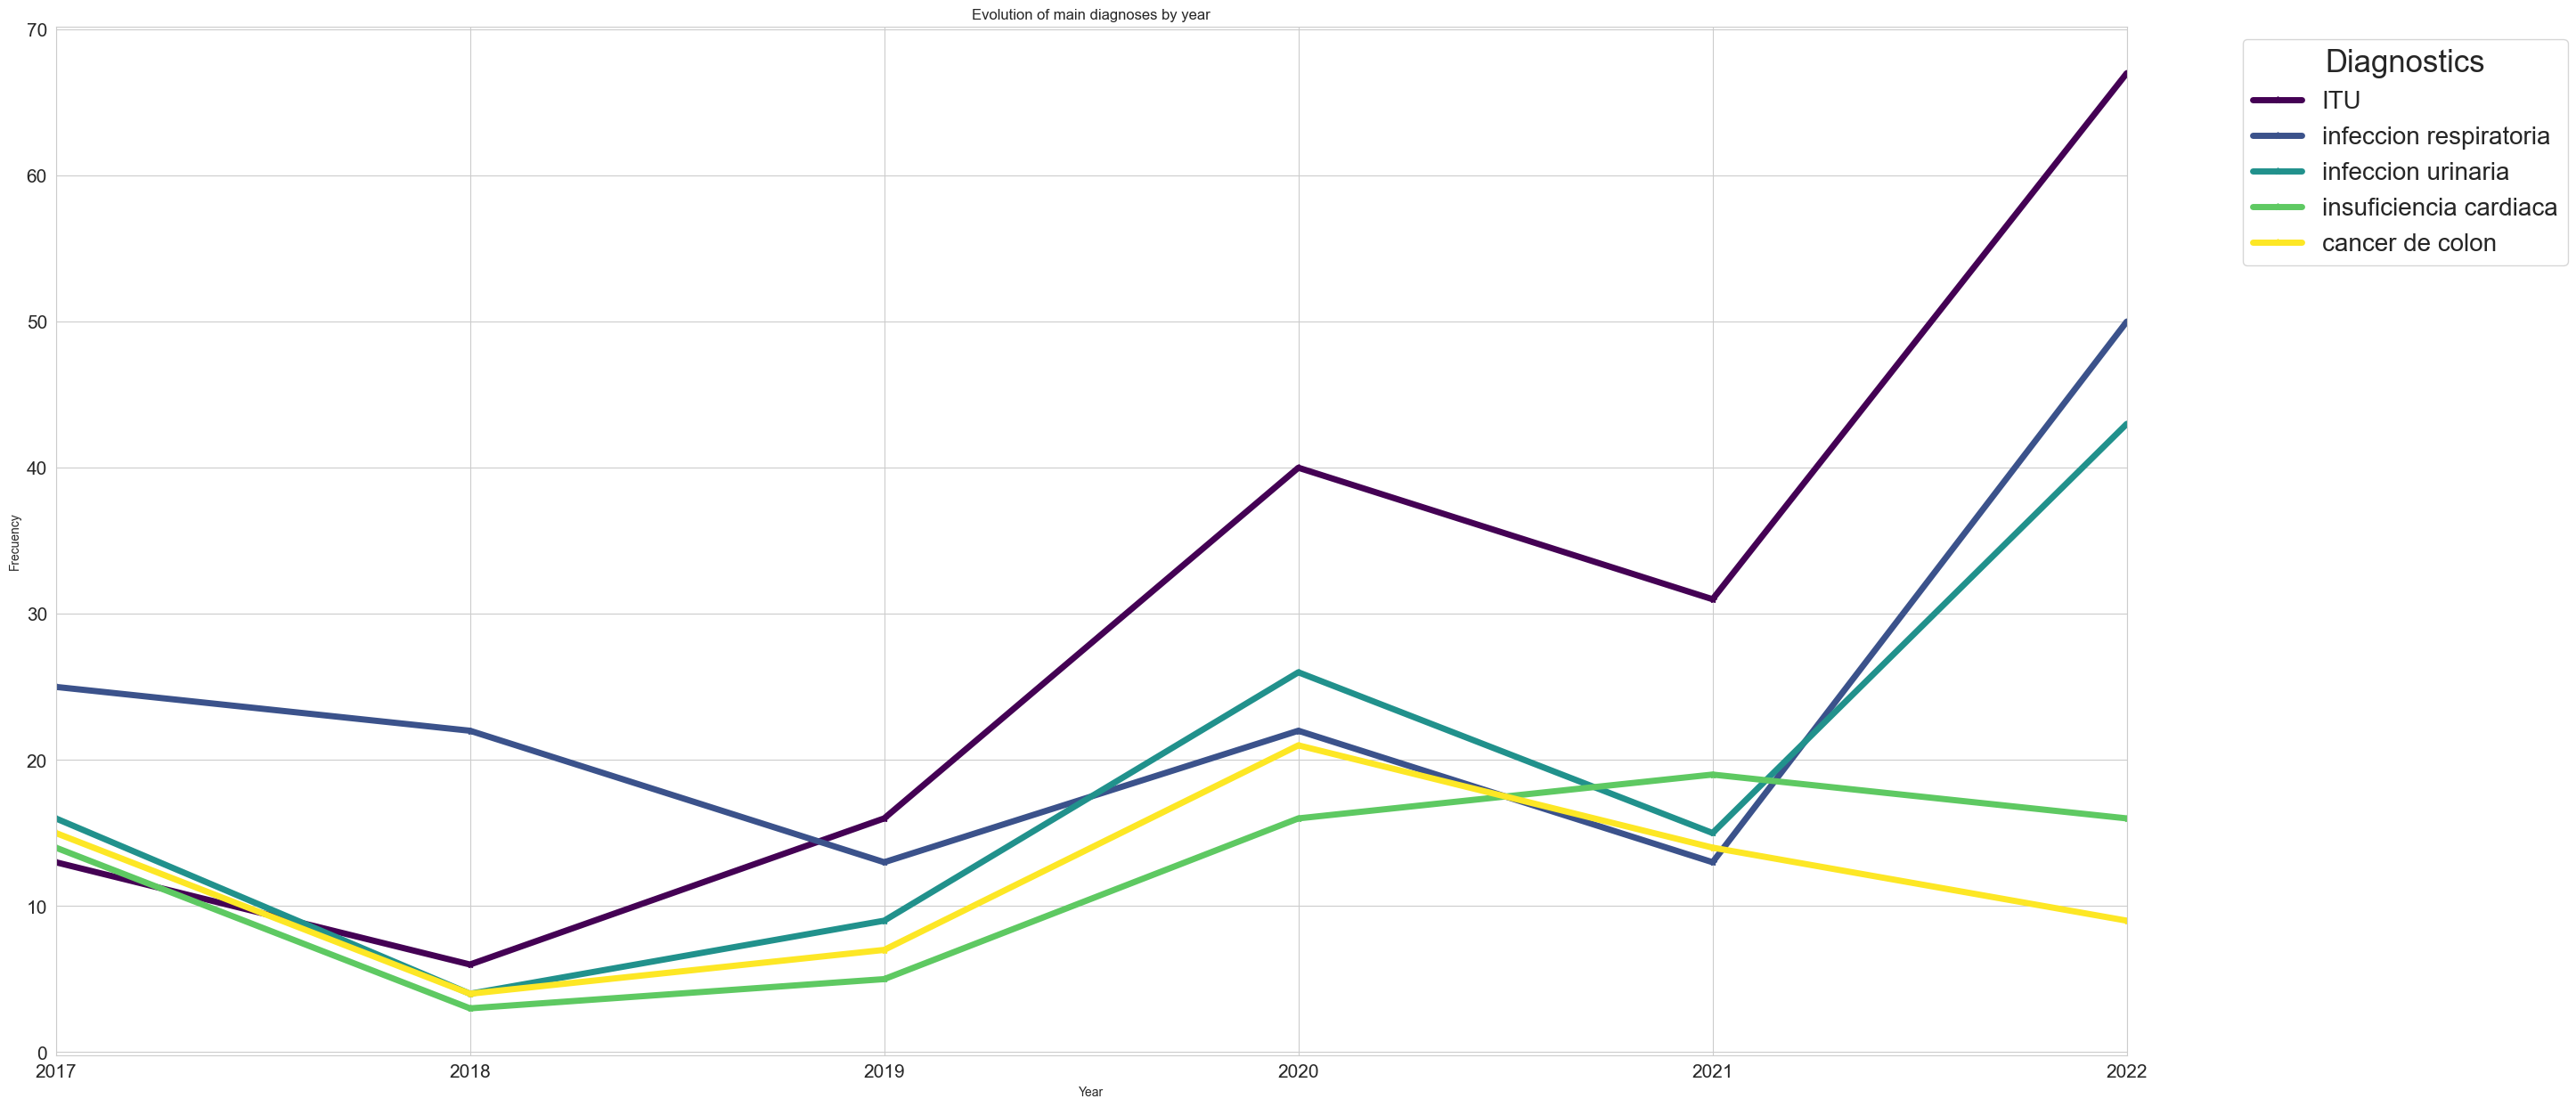

In [20]:
df_diagnostics = df.copy()
df_diagnostics['year'] = pd.to_datetime(df_diagnostics['year'], format="%Y")  # Convert the year to a date format "OJO que estamos pasándolo a DATE_TIME AQUÍ"
diagnosis_by_year = df_diagnostics.groupby(['year', 'diagnostico']).size().unstack('diagnostico')
fig, ax = plt.subplots(figsize=(30,15))
diagnosis_by_year[top_diagnoses].plot(kind='line',ax=ax, cmap='viridis', fontsize=15, linewidth=5, marker='*')
plt.title('Evolution of main diagnoses by year')
plt.xlabel('Year')
plt.ylabel('Frecuency')
plt.legend(title='Diagnostics', title_fontsize='25', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='20')
plt.show()

In [21]:
import plotly.graph_objects as go

def visualize_diagnostics_by_year_plotly(df, top_n=5):
    """
    Visualize the evolution of main diagnoses by year using an interactive line chart with Plotly.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing diagnostic data with a 'year' column.
    - top_diagnoses (list): The list of top diagnoses to visualize.
    
    Returns:
    None. Displays an interactive line chart showing the evolution of main diagnoses by year.
    """
    
    # Ensure 'year' column is in datetime format
    df['year'] = pd.to_datetime(df['year'], format="%Y")
    
    # Group and unstack data
    diagnosis_by_year = df.groupby(['year', 'diagnostico']).size().unstack('diagnostico')
    
    
    diagnostic_counts = df['diagnostico'].value_counts()
    top_diagnoses = diagnostic_counts.index[:top_n]
    
    # Create the interactive line chart
    fig = go.Figure()
    
    for diagnosis in top_diagnoses:
        fig.add_trace(go.Scatter(x=diagnosis_by_year.index, 
                                 y=diagnosis_by_year[diagnosis],
                                 mode='lines+markers',
                                 name=diagnosis,
                                 marker=dict(size=10, line=dict(width=2)),
                                 line=dict(width=4)))
    
    # Update the layout
    fig.update_layout(
        title="Evolution of Main Diagnoses by Year",
        xaxis_title="Year",
        yaxis_title="Frequency",
        font=dict(size=15),
        legend_title_text='Diagnosis',
        legend=dict(font=dict(size=12))
    )
    
    # Show the plot
    fig.show()

# For demonstration, visualize data using the sample data
# Note: This won't display here, but will work in a local environment.
visualize_diagnostics_by_year_plotly(df, top_n=4)


# 5.Pandas Profiling

In [22]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
# profile.to_file("pandas_profile_report.html")

# 6.DASH

Testing with DASH for visualize the data

In [29]:
# Inicializando la aplicación
app = dash.Dash(__name__)

# Estilo personalizado
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Creando el layout de la aplicación
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Análisis de Diagnósticos',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    html.Div(children='Seleccione un diagnóstico y una columna para visualizar:', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    dcc.Dropdown(
        id='diagnostico',
        options=[{'label': i, 'value': i} for i in df['diagnostico'].unique()],
        value='ITU (infeccion del tracto urinario)',
        style={
            'width': '50%',
            'padding-left': '25%',
            'padding-right': '25%',
            'color': colors['text']
        }
    ),
    dcc.Dropdown(
        id='column',
        options=[{'label': i, 'value': i} for i in df.columns],
        value='s_procedencia',
        style={
            'width': '50%',
            'padding-left': '25%',
            'padding-right': '25%',
            'color': colors['text']
        }
    ),
    dcc.Graph(id='graph'),
])

# Función callback para actualizar el gráfico basado en el diagnóstico y columna seleccionada
@app.callback(
    Output('graph', 'figure'),
    [Input('diagnostico', 'value'), Input('column', 'value')]
)
def update_figure(selected_diagnosis, selected_column):
    filtered_df = df[df.diagnostico == selected_diagnosis]
    # Ordenando los valores del histograma y tomando solo los 10 más comunes
    filtered_df = filtered_df[selected_column].value_counts().sort_values(ascending=False).reset_index()
    fig = px.histogram(filtered_df, x='index', y=selected_column,
                       title=f"Frecuencia de {selected_column} para {selected_diagnosis}")
    fig.update_layout(
        plot_bgcolor=colors['background'],
        paper_bgcolor=colors['background'],
        font_color=colors['text']
    )
    # Actualizando las etiquetas del eje X
    fig.update_xaxes(title=selected_column)

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.lib.display.IFrame object at 0x00000157862F0940>

In [30]:

# Inicializando la aplicación
app = dash.Dash(__name__)

# Estilo personalizado
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

# Creando el layout de la aplicación
app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.H1(
        children='Análisis de Diagnósticos',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    html.Div(children='Seleccione un diagnóstico y una columna para visualizar:', style={
        'textAlign': 'center',
        'color': colors['text']
    }),
    dcc.Dropdown(
        id='diagnostico',
        options=[{'label': i, 'value': i} for i in df['diagnostico'].unique()],
        value='ITU (infeccion del tracto urinario)',
        style={
            'width': '50%',
            'padding-left': '25%',
            'padding-right': '25%',
            'color': colors['text']
        }
    ),
    dcc.Dropdown(
        id='column',
        options=[{'label': i, 'value': i} for i in df.columns],
        value='s_procedencia',
        style={
            'width': '50%',
            'padding-left': '25%',
            'padding-right': '25%',
            'color': colors['text']
        }
    ),
    dcc.Graph(id='graph'),
    html.Button('Reset', id='reset_button')
])

# Función callback para actualizar el gráfico basado en el diagnóstico y columna seleccionada
@app.callback(
    Output('graph', 'figure'),
    [Input('diagnostico', 'value'), Input('column', 'value'), Input('reset_button', 'n_clicks')]
)
def update_figure(selected_diagnosis, selected_column, n_clicks):
    if n_clicks is None:
        filtered_df = df[df.diagnostico == selected_diagnosis]
        filtered_df = filtered_df[selected_column].value_counts().nlargest(10).sort_values().reset_index()
        fig = px.bar(filtered_df, x=selected_column, y='index', orientation='h',
                     title=f"Frecuencia de {selected_column} para {selected_diagnosis}")
        fig.update_layout(
            plot_bgcolor=colors['background'],
            paper_bgcolor=colors['background'],
            font_color=colors['text']
        )
        # Actualizando las etiquetas del eje X
        fig.update_xaxes(title=selected_column)
        fig.update_yaxes(title=selected_diagnosis)

        return fig
    else:
        raise dash.exceptions.PreventUpdate


if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.lib.display.IFrame object at 0x000001571944BD30>

In [31]:
df = catalog.load("hado_final")

[10/23/23 17:27:00] INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:492

Una vez se haya realizado la limpieza y preprocesamiento realizamos los siguientes pasos:

# 7.Vectorización de texto

La vectorización de texto es el proceso de convertir palabras en vectores numéricos que pueden ser entendidos y procesados por un algoritmo de machine learning. Existen diferentes técnicas para hacer esto, entre las que se incluyen Bag of Words, TF-IDF, y Word2Vec.

>Word2Vec es un método que utiliza redes neuronales para aprender representaciones vectoriales de palabras a partir de un corpus de texto. Este método tiene la ventaja de que puede capturar el significado semántico de las palabras.

Tenemos que convertir los diagnosticos en una lista de listas haciendo un split de la variable 
```python
diagnosticos = df['diagnosticos'].unique()`
```
Utilizaremos para los vectores
1. **Máximo**: En lugar de tomar el promedio de los vectores de palabras, puedo tomar el máximo de cada componente de los vectores de palabras. Este enfoque podría capturar la "palabra más importante" en cada dimensión del espacio vectorial.

2. **Suma**: Podría sumar los vectores de las palabras, lo que daría más peso a los diagnósticos con más palabras.

3. **Promedio**: Promediando los vectores de todas las palabras en cada diagnóstico.

4. **Concatenación**: Si el tamaño de los vectores es pequeño, podría considerarse concatenar los vectores de las palabras en lugar de promediarlos. Esto resultaría en vectores de diagnóstico más grandes, pero también podría capturar más información.

## 7.1.Stopwords

In [32]:
df\
.isna()\
.sum()


h_procedencia                 0
hospital_category             0
s_procedencia                 0
procedencia_category          0
diagnostico                   0
diagnosis_category            0
motivo_ing                    0
ingreso_category              0
motivo_alta                   0
alta_category                 0
fecha_alta                    0
ap                            0
n_estancias                   0
n_visitas                     0
paliativo_onc_noc             0
paliativo_no_onc_noc          0
fiebre                        0
disnea                        0
dolor                         0
delirium                      0
sedacion                      0
p_terminal                    0
agonia                        0
ast_anorx                     0
cronico_reag                  0
trato_antibiotico             0
transfusion                   0
paracentesis                  0
agudo_estable                 0
toracocentesis                0
fe_iv                         0
ps_ecog

In [33]:
# Cargamos las stopwords
from nltk.corpus import stopwords

# Descargar las stopwords de NLTK
nltk.download('stopwords')

# Obtener las stopwords en español
stopwords_es = stopwords.words('spanish')

# Aplicar la eliminación de stopwords a las columnas deseadas
columns_to_clean = ['motivo_ing', 'motivo_alta', 'diagnostico',]

for column in columns_to_clean:
    df[column] = df[column].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_es]))


[nltk_data] Downloading package stopwords to C:\Users\Pablo
[nltk_data]     Villar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
print(stopwords_es)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

## 7.2.Split for list of lists

In [35]:
# Hacemos una lista de listas para poder pasar los textos a vectores

diagnosticos = df['diagnostico'].unique()

diagnosticos_split = [diagnostico.split() for diagnostico in diagnosticos]

# Filtro diagnosticos vacíos si existen... 
diagnosticos_split = [diagnostico for diagnostico in diagnosticos_split if diagnostico]

In [36]:
diagnosticos_split[:20]


[
    ['cancer', 'orl'],
    ['melanoma', 'vulvar'],
    ['cancer', 'broncogenico'],
    ['cirrosis', 'hepatica'],
    ['neoplasia', 'mama', 'estadio', 'IV'],
    ['anemia'],
    ['adenoma', 'pulmon'],
    ['leucemia', 'linfatica', 'cronica'],
    ['fx', 'meseta', 'tibial'],
    ['cancer', 'mama'],
    ['cancer', 'prostata'],
    ['deterioro', 'general'],
    ['tumor', 'cerebral'],
    ['adenoma', 'colon', 'IV'],
    ['cancer', 'colon'],
    ['neumonia'],
    ['niemannpick'],
    ['sarcoidosis'],
    ['cancer', 'pancreas'],
    ['infeccion', 'urinaria', 'fallo', 'cardiaco']
]

# 8.Word2Vec

Word2Vec es una técnica específica que se utiliza para el aprendizaje automático de representaciones de palabras. En esencia, convierte palabras en vectores de números de tal manera que las palabras con significados similares terminan con vectores similares. Esto permite que las operaciones matemáticas se realicen en palabras, lo que puede ser muy útil para muchas tareas de NLP.



In [37]:
from gensim.models import Word2Vec

# Asumiendo que los diagnósticos ya están preprocesados y almacenados en una lista de listas,
# donde cada lista interna contiene las palabras de un diagnóstico.
# Por ejemplo: [["neoplasia", "pancreas"], ["adenocarcinoma", "de", "pulmón"], ...]

# Entrenamos el modelo Word2Vec
model = Word2Vec(diagnosticos_split, min_count=1, vector_size=50)

# Ahora podemos obtener el vector de una palabra en particular
vector = model.wv['cancer']

# O incluso obtener la palabra más similar a 'neoplasia'
similar = model.wv.most_similar('cancer')


>En el código anterior, min_count es el número mínimo de veces que una palabra debe aparecer en el corpus para ser incluida en el modelo, y vector_size es la dimensión de los vectores de palabra.

In [38]:
similar


[
    ('extremidades', 0.512345552444458),
    ('dilatadaicccirrosis', 0.4648784399032593),
    ('f', 0.40824922919273376),
    ('abdominaldemencia', 0.4011690616607666),
    ('hidrocefalia', 0.383207231760025),
    ('colangitiscirrosis', 0.38253164291381836),
    ('bronquialveolar', 0.36386537551879883),
    ('cv', 0.3560919761657715),
    ('secundario', 0.35554829239845276),
    ('complicacada', 0.35340601205825806)
]

In [39]:
vector


array([ 0.00053881, -0.00031167,  0.01060988,  0.01891075, -0.02099425,
       -0.01649244,  0.01638055,  0.02387845, -0.01506312, -0.00725305,
        0.01432752, -0.00611988, -0.01004254,  0.01518422, -0.01241652,
        0.00026281,  0.00694646,  0.0032353 , -0.02167222, -0.02291157,
        0.01683411,  0.01296221,  0.01991697, -0.00152752,  0.01537758,
       -0.00623267, -0.00449258,  0.01096287, -0.01761723, -0.00521478,
       -0.01417956, -0.00176219,  0.02029117, -0.0151447 , -0.00802659,
       -0.00140341,  0.01823761, -0.01312482,  0.00069714, -0.01454415,
       -0.0165098 ,  0.00914041, -0.01813373, -0.00923981,  0.00649857,
        0.00011728, -0.01785925,  0.01602187,  0.0130616 ,  0.02090717],
      dtype=float32)

```python
model = Word2Vec(diagnosticos_split, min_count=1, vector_size=50)
```
En `model` se está entrenando un modelo **Word2Vec** con los diagnósticos.

* La opción **min_count=1** significa que las palabras que aparecen al menos una vez en los diagnósticos serán consideradas por el modelo.

* **vector_size=50** define la dimensionalidad de los vectores de palabras generados por el modelo.
```python
model.wv['cancer']
```
* Devuelve el vector de la palabra `cancer`. Este vector es un arreglo de 50 números ***(porque se ha definido vector_size=50)*** que representa el significado de `cancer` según lo aprendido por el modelo de los diagnósticos.
```python
model.wv.most_similar('cancer')
```
* Devuelve las palabras más similares a `cancer` según lo aprendido por el modelo de los diagnósticos. La similitud se mide en términos de la similitud del coseno entre los vectores de palabras.

>**El modelo Word2Vec** necesita una gran cantidad de datos para aprender representaciones de palabras significativas. Si solo existe un pequeño número de diagnósticos, los vectores de palabras generados por el modelo podrían no ser muy significativos. En este caso, se puede considerar el uso de vectores de palabras pre-entrenados, como los disponibles en bibliotecas como spaCy o gensim.

## 8.1.Gensim

Gensim es una biblioteca de Python muy popular para el modelado de temas y el procesamiento del lenguaje natural (NLP). Proporciona implementaciones eficientes y escalables de varios algoritmos de NLP, como Word2Vec, FastText, Latent Semantic Analysis (LSA), Latent Dirichlet Allocation (LDA) y otros.

Gensim es una opción popular para usar Word2Vec por varias razones:

1. **Eficiencia**: Gensim está diseñado para ser eficiente y para manejar grandes conjuntos de datos. Utiliza técnicas como la transmisión de datos y la segmentación de memoria para mantener una huella de memoria baja.

2. **Facilidad de uso**: Gensim proporciona una interfaz simple y directa para el uso de algoritmos de NLP complejos como Word2Vec.

3. **Flexibilidad**: Gensim permite un control detallado sobre los parámetros de los modelos, lo que puede ser útil para ajustar el rendimiento del modelo para tareas específicas.

4. **Comunidad de apoyo**: Gensim es una biblioteca muy utilizada con una gran comunidad de usuarios y desarrolladores. Esto significa que hay una gran cantidad de documentación, tutoriales y soporte disponible.

En cuanto a por qué Word2Vec y Gensim son buenas elecciones para el análisis de diagnósticos médicos, hay varias razones. 

* Los diagnósticos médicos a menudo contienen términos y frases muy específicos, y Word2Vec puede ser útil para capturar las similitudes semánticas entre estos términos. 
  
* Gensim es una opción práctica porque permite un manejo eficiente de grandes conjuntos de datos, que a menudo se encuentran en aplicaciones médicas. 
  
* Por último, la capacidad de Gensim para ajustar detalladamente los parámetros del modelo puede ser útil para afinar el rendimiento del modelo en el análisis de diagnósticos médicos.


## 8.2.Enfoque TF-IDF

No todos los diagnósticos tendrán el mismo número de palabras, y algunos diagnósticos pueden tener palabras que son más importantes que otras para determinar el significado del diagnóstico. En estos casos, tomar el promedio de los vectores de palabras puede no ser la mejor representación.

Una opción es usar un enfoque más sofisticado como TF-IDF (Term Frequency-Inverse Document Frequency) para dar más peso a las palabras que son más importantes en un diagnóstico y menos peso a las palabras que son comunes en muchos diagnósticos.

> Pero, en muchos casos, palabras comunes como "cancer" o "infeccion" son de hecho muy importantes para el diagnóstico, y el enfoque TF-IDF puede darles menos peso porque son comunes.

In [41]:
start_time = time.time()

# Convertimos los diagnósticos a cadenas de texto para usar con TfidfVectorizer
diagnosticos_str = [' '.join(diagnostico) for diagnostico in diagnosticos_split]

# Entrenamos el modelo Word2Vec
model = Word2Vec(diagnosticos_split, min_count=10, vector_size=50)

# Creamos un diccionario para mapear cada palabra a su vector Word2Vec
word_to_vec = {word: model.wv[word] for word in model.wv.key_to_index.keys()}

# Crea un vectorizador TF-IDF, limitando el vocabulario a las palabras que están en el modelo Word2Vec
vectorizer = TfidfVectorizer(vocabulary=model.wv.key_to_index)

# Calcula los vectores TF-IDF para los diagnósticos
tfidf = vectorizer.fit_transform(diagnosticos_str)

# Ahora podemos obtener el vector TF-IDF para cada diagnóstico
diagnosticos_vec = []
for i in range(tfidf.shape[0]):
    tfidf_diag = tfidf.getrow(i)
    diag_vec = np.mean([word_to_vec[word] * tfidf_diag[0, vectorizer.vocabulary_[word]] 
                        for word in diagnosticos_split[i] if word in word_to_vec], axis=0)
    diagnosticos_vec.append(diag_vec)

end_time = time.time()
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")

Tiempo de ejecución: 0.09601426124572754 segundos


In [42]:
diagnosticos_vec[0]
# cada vector representa un diagnóstico en el conjunto de datos, por lo que cada número 
# en el vector corresponde a un peso TF-IDF para una palabra específica en ese diagnóstico.


array([-1.07192923e-03,  3.41745588e-04,  9.69552342e-03,  1.81309953e-02,
       -1.87602919e-02, -1.46653336e-02,  1.37746930e-02,  1.87434182e-02,
       -1.06976423e-02, -8.15638527e-03,  1.46546829e-02, -4.38743643e-03,
       -8.43501370e-03,  1.36949271e-02, -1.01269679e-02, -3.06881475e-03,
        6.33958168e-03,  2.49873032e-03, -1.73901189e-02, -1.98962763e-02,
        1.53656090e-02,  1.08814063e-02,  1.42986998e-02,  1.46753318e-03,
        1.32363020e-02, -6.67313160e-03, -1.75256399e-03,  1.21476222e-02,
       -1.54779535e-02, -7.67438998e-03, -1.52862929e-02, -2.32684775e-03,
        1.93073563e-02, -1.51183521e-02, -5.47488080e-03, -3.93139524e-03,
        1.70723852e-02, -1.19485864e-02,  6.40605504e-05, -9.34303366e-03,
       -1.88834015e-02,  9.86505207e-03, -1.75814070e-02, -8.64918064e-03,
        7.72857864e-04, -6.06827613e-04, -1.55261615e-02,  1.86769757e-02,
        1.00582577e-02,  1.91482659e-02], dtype=float32)

# 9.EDA Vectores 

1. **Calcular y graficar la longitud de los vectores**: La longitud (o norma) de un vector puede ser una característica interesante a explorar. Puede calcularse la longitud de un vector usando la función `np.linalg.norm`

2. **Visualizar los vectores con PCA**: Puede usarse el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los vectores a 2 o 3 dimensiones, y luego visualizarlos en un gráfico de dispersión.

3. Otros...

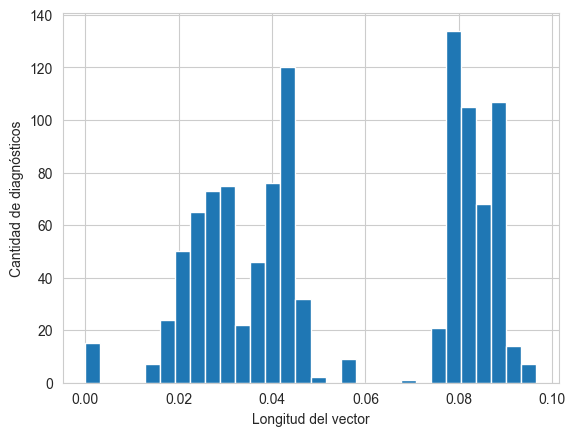

In [43]:
# Calcular y graficar la longitud de los vectores


# Calcula la longitud de cada vector
vector_lengths = [np.linalg.norm(vec) for vec in diagnosticos_vec]

# Grafica un histograma de las longitudes
plt.hist(vector_lengths, bins=30, color='tab:blue', edgecolor='white')
plt.xlabel('Longitud del vector')
plt.ylabel('Cantidad de diagnósticos')
plt.show();

In [45]:
# Visualizar los vectores con PCA

# Reduce la dimensionalidad a 2
pca = PCA(n_components=2)
diagnosticos_pca = pca.fit_transform(diagnosticos_vec)

# Grafica los vectores en 2D
plt.scatter(diagnosticos_pca[:, 0], diagnosticos_pca[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

# You will see an Error because the vector don't have the same lenght or they are None

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│    2                                                                                             │
│    3 # Reduce la dimensionalidad a 2                                                             │
│    4 pca = PCA(n_components=2)                                                                   │
│ ❱  5 diagnosticos_pca = pca.fit_transform(diagnosticos_vec)                                      │
│    6                                                                                             │
│    7 # Grafica los vectores en 2D                                                                │
│    8 plt.scatter(diagnosticos_pca[:, 0], diagnosticos_pca[:, 1])                                 │
│                                                                                                  │
│ c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages\sklearn\utils\_set_output │
│ .py:140 in wrapped                                                                               │
│                                                                                                  │
│   137 │                                                                                          │
│   138 │   @wraps(f)                                                                              │
│   139 │   def wrapped(self, X, *args, **kwargs):                                                 │
│ ❱ 140 │   │   data_to_wrap = f(self, X, *args, **kwargs)                                         │
│   141 │   │   if isinstance(data_to_wrap, tuple):                                                │
│   142 │   │   │   # only wrap the first output for cross decomposition                           │
│   143 │   │   │   return (                                                                       │
│                                                                                                  │
│ c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages\sklearn\decomposition\_pc │
│ a.py:462 in fit_transform                                                                        │
│                                                                                                  │
│   459 │   │   """                                                                                │
│   460 │   │   self._validate_params()                                                            │
│   461 │   │                                                                                      │
│ ❱ 462 │   │   U, S, Vt = self._fit(X)                                                            │
│   463 │   │   U = U[:, : self.n_components_]                                                     │
│   464 │   │                                                                                      │
│   465 │   │   if self.whiten:                                                                    │
│                                                                                                  │
│ c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages\sklearn\decomposition\_pc │
│ a.py:485 in _fit                                                                                 │
│                                                                                                  │
│   482 │   │   │   │   "TruncatedSVD for a possible alternat

# Error
Este error se produce cuando se está intentando aplicar PCA a una lista de vectores, pero algunos de estos vectores no son de la misma longitud o son `None`. El error puede deberse a que algunas de las palabras en los diagnósticos no están en el modelo Word2Vec, por lo que no se creó ningún vector para ellas.

>Para solucionar este problema, puede hacerse una comprobación adicional al calcular los vectores de los diagnósticos. Si el vector para un diagnóstico es `None` o tiene longitud cero, puede reemplazarse por un vector de ceros.

````python
diagnosticos_vec = []
for i in range(tfidf.shape[0]):
    tfidf_diag = tfidf.getrow(i)
    words_vecs = [word_to_vec[word] * tfidf_diag[0, vectorizer.vocabulary_[word]] 
                  for word in diagnosticos_split[i] if word in word_to_vec]
    if words_vecs:
        diag_vec = np.mean(words_vecs, axis=0)
    else:
        diag_vec = np.zeros(model.vector_size)  # reemplaza vectores vacíos por vectores de ceros
    diagnosticos_vec.append(diag_vec)
````

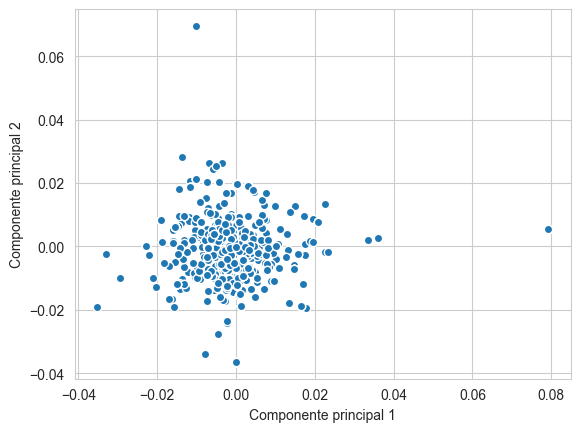

In [46]:
# Visualizar los vectores con PCA

from sklearn.decomposition import PCA

# Vectores con la misma longitud
diagnosticos_vec = []
for i in range(tfidf.shape[0]):
    tfidf_diag = tfidf.getrow(i)
    words_vecs = [word_to_vec[word] * tfidf_diag[0, vectorizer.vocabulary_[word]] 
                  for word in diagnosticos_split[i] if word in word_to_vec]
    if words_vecs:
        diag_vec = np.mean(words_vecs, axis=0)
    else:
        diag_vec = np.zeros(model.vector_size)  # reemplaza vectores vacíos por vectores de ceros
    diagnosticos_vec.append(diag_vec)
    
# Reduce la dimensionalidad a 2
pca = PCA(n_components=2)
diagnosticos_pca = pca.fit_transform(diagnosticos_vec)

# Grafica los vectores en 2D
plt.scatter(diagnosticos_pca[:, 0], diagnosticos_pca[:, 1], c='tab:blue', edgecolors='white')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [47]:
# Reduce la dimensionalidad a 3
pca = PCA(n_components=3)
diagnosticos_pca = pca.fit_transform(diagnosticos_vec)

# Crea el gráfico de dispersión 3D
fig = go.Figure(data=[go.Scatter3d(
    x=diagnosticos_pca[:, 0],
    y=diagnosticos_pca[:, 1],
    z=diagnosticos_pca[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=diagnosticos_pca[:, 2],   # utiliza la tercera componente para el color
        colorscale='Viridis',            # elige una escala de colores
        opacity=0.8
    )
)])

# Actualiza los ejes del gráfico
fig.update_layout(
    scene = dict(
        xaxis_title='Componente principal 1',
        yaxis_title='Componente principal 2',
        zaxis_title='Componente principal 3',
        aspectmode='cube'                # hace que los ejes tengan la misma escala
    ),
    margin=dict(l=0, r=0, b=0, t=0),    # elimina los márgenes alrededor del gráfico
    scene_camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))   # ajusta la posición inicial de la cámara
)

fig.show()

# la opción aspectmode='cube' es para hacer que los ejes tengan la misma escala,
# lo que puede hacer que la visualización sea más fácil de interpretar.


# 10.Calculo los Vectores

## 10.1.Máximo (toma el valor máximo de cada dimensión a través de todas las palabras en el diagnóstico)


In [48]:
diagnosticos_vec_max = [np.max([model.wv[word] for word in diagnostico if word in model.wv.key_to_index], axis=0) 
                        if diagnostico and any(word in model.wv.key_to_index for word in diagnostico)
                        else np.zeros(model.vector_size) 
                        for diagnostico in diagnosticos_split]


In [49]:
# Entonces podemos entrenar un modelo KMeans en estos vectores.
kmeans = KMeans(n_clusters=3)  # Ajusta este número a la cantidad de grupos que creas adecuada
kmeans.fit(diagnosticos_vec_max)

# Ahora podemos obtener las etiquetas de los grupos para cada diagnóstico
labels = kmeans.labels_

labels

[10/23/23 17:31:11] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\cluster\_kmeans.py:870: FutureWarning:                                       
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

array([2, 0, 2, ..., 0, 0, 0])

## 10.2.Suma (suma los vectores de todas las palabras en el diagnóstico)

In [51]:
diagnosticos_vec_sum = [np.sum([model.wv[word] for word in diagnostico if word in model.wv.key_to_index], axis=0) 
                        if diagnostico and any(word in model.wv.key_to_index for word in diagnostico)
                        else np.zeros(model.vector_size) 
                        for diagnostico in diagnosticos_split]

## 10.3.Promedio (promediando los vectores de todas las palabras en cada diagnóstico)

In [52]:
diagnosticos_vec_mean = [np.mean([model.wv[word] for word in diagnostico if word in model.wv.key_to_index], axis=0) 
                        if diagnostico and any(word in model.wv.key_to_index for word in diagnostico)
                        else np.zeros(model.vector_size) 
                        for diagnostico in diagnosticos_split]

## 10.4.Concatenación (concatena los vectores de todas las palabras en el diagnóstico)

Este método requerirá que todas las listas de diagnósticos tengan la misma longitud (es decir, el mismo número de palabras). Si no es así, tendrás que rellenar las listas más cortas con algún valor (como un vector de ceros).

> Este último método puede resultar en vectores muy largos si los diagnósticos contienen muchas palabras, lo que puede hacer que los modelos de aprendizaje automático sean más difíciles de entrenar.

In [53]:
# Asumimos que 'max_len' es la longitud del diagnóstico más largo en 'diagnosticos_split'
max_len = max([len(diagnostico) for diagnostico in diagnosticos_split])

diagnosticos_pad = pad_sequences(diagnosticos_split, maxlen=max_len, dtype='object', padding='post')
'''pad_sequences se utiliza para garantizar que todas las secuencias (en este caso, listas de vectores de palabras) 
tengan la misma longitud añadiendo "relleno" según sea necesario. Este relleno se hace con vectores de ceros, 
que son de tipo float32, para que coincidan con el tipo de datos de los vectores de palabras existentes.'''

diagnosticos_vec_concat = [np.concatenate([model.wv[word] if word in model.wv.key_to_index else np.zeros(model.vector_size) for word in diagnostico]) for diagnostico in diagnosticos_pad]

In [54]:
diagnosticos_vec_concat[:5]


[
    array([-0.00107193,  0.00034175,  0.00969552, ...,  0.        ,
        0.        ,  0.        ]),
    array([0., 0., 0., ..., 0., 0., 0.]),
    array([-0.00107193,  0.00034175,  0.00969552, ...,  0.        ,
        0.        ,  0.        ]),
    array([ 0.00265928, -0.01979192,  0.00873776, ...,  0.        ,
        0.        ,  0.        ]),
    array([ 0.00291542, -0.00540972, -0.01472694, ...,  0.        ,
        0.        ,  0.        ])
]

>Ahora que tenemos los vectores de diagnóstico (ya sea máximo, suma, promedio o concatenación), pueden usarse como entrada para un algoritmo de aprendizaje automático o análisis de datos. Por ejemplo, estos vectores pueden alimentar a un algoritmo de clustering para agrupar diagnósticos similares, o a un algoritmo de clasificación para predecir alguna etiqueta basada en el texto del diagnóstico.

# Funciones

> Cuando tenemos un modelo Word2Vec model y una lista de diagnósticos divididos en palabras data_split podemos realizar estas funciones

Estas funciones realizan los siguientes pasos:
<hr>

* **create_vectors**: Crea vectores para los diagnósticos utilizando el método especificado (máximo, suma, media).

* **cluster_diagnosticos**: Aplica el algoritmo KMeans a los vectores de los diagnósticos.

* **create_clusters**: Crea un diccionario donde las llaves son las etiquetas de los clusters y los valores son las listas de diagnósticos que pertenecen a cada cluster.

* **print_clusters**: Imprime los diagnósticos en cada cluster.

* **print_top_words**: Imprime las palabras más comunes en cada cluster.
<hr>

* Código:
````python
import numpy as np
from sklearn.cluster import KMeans
import collections

def create_vectors(model, data_split, method='mean'):
    if method == 'max':
        data_vec = [np.max([model.wv[word] for word in data_item], axis=0) 
                            if data_item else np.zeros(model.vector_size) 
                            for data_item in data_split]
    elif method == 'sum':
        data_vec = [np.sum([model.wv[word] for word in text if word in model.wv.vocab], axis=0) 
                    for text in data_split]
        
    elif method == 'mean':
        data_vec = [np.mean([model.wv[word] for word in data_item], axis=0) 
                            if data_item else np.zeros(model.vector_size) 
                            for data_item in data_split]
    return data_vec

def cluster_data(data_vec, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_vec)
    labels = kmeans.labels_
    return labels

def create_clusters(data_split, labels, n_clusters=5):
    clusters = {i: [] for i in range(n_clusters)}
    for data_item, label in zip(data_split, labels):
        clusters[label].append(' '.join(data_item))
    return clusters

def print_clusters(clusters):
    for label, data_items in clusters.items():
        print(f'Cluster {label}:')
        for data_item in data_items:
            print(f'  {data_item}')

def print_top_words(clusters, n_words=10):
    for label, data_items in clusters.items():
        words = [word for data_item in data_items for word in data_item.split()]
        word_counts = collections.Counter(words)
        print(f'Cluster {label}:')
        for word, count in word_counts.most_common(n_words):
            print(f'  {word}: {count}')

````



In [55]:
# Hardcode con diagnosticos_split

def create_vectors(model, diagnosticos_split, method='mean'):
    if method == 'max':
        diagnosticos_vec = [np.max([model.wv[word] for word in diagnostico if word in model.wv.key_to_index], axis=0) 
                        if diagnostico and any(word in model.wv.key_to_index for word in diagnostico)
                        else np.zeros(model.vector_size) 
                        for diagnostico in diagnosticos_split]
    elif method == 'sum':
        diagnosticos_vec = [np.sum([model.wv[word] for word in diagnostico if word in model.wv.key_to_index], axis=0) 
                        if diagnostico and any(word in model.wv.key_to_index for word in diagnostico)
                        else np.zeros(model.vector_size) 
                        for diagnostico in diagnosticos_split]
    elif method == 'mean':
        diagnosticos_vec = [np.mean([model.wv[word] for word in diagnostico if word in model.wv.key_to_index], axis=0) 
                        if diagnostico and any(word in model.wv.key_to_index for word in diagnostico)
                        else np.zeros(model.vector_size) 
                        for diagnostico in diagnosticos_split]
    return diagnosticos_vec

def cluster_diagnosticos(diagnosticos_vec, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(diagnosticos_vec)
    labels = kmeans.labels_
    return labels

def create_clusters(diagnosticos_split, labels, n_clusters=5):
    clusters = {i: [] for i in range(n_clusters)}
    for diagnostico, label in zip(diagnosticos_split, labels):
        clusters[label].append(' '.join(diagnostico))
    return clusters

def print_clusters(clusters):
    for label, diagnosticos in clusters.items():
        print(f'Cluster {label}:')
        for diagnostico in diagnosticos:
            print(f'  {diagnostico}')

def print_top_words(clusters, n_words=10):
    for label, diagnosticos in clusters.items():
        palabras = [palabra for diagnostico in diagnosticos for palabra in diagnostico.split()]
        conteo_palabras = collections.Counter(palabras)
        print(f'Cluster {label}:')
        for palabra, conteo in conteo_palabras.most_common(n_words):
            print(f'  {palabra}: {conteo}')

In [56]:
# Genérico

def create_vectors(model, data_split, method='mean'):
    if method == 'max':
        data_vec = [np.max([model.wv[word] for word in data_item if word in model.wv.key_to_index], axis=0) 
                            if any(word in model.wv.key_to_index for word in data_item) else np.zeros(model.vector_size) 
                            for data_item in data_split]
    elif method == 'sum':
        data_vec = [np.sum([model.wv[word] for word in data_item if word in model.wv.key_to_index], axis=0) 
                            if any(word in model.wv.key_to_index for word in data_item) else np.zeros(model.vector_size) 
                            for data_item in data_split]
    elif method == 'mean':
        data_vec = [np.mean([model.wv[word] for word in data_item if word in model.wv.key_to_index], axis=0) 
                            if any(word in model.wv.key_to_index for word in data_item) else np.zeros(model.vector_size) 
                            for data_item in data_split]
        
    elif method == 'concat':
        max_len = max([len(data_item) for data_item in data_split])
        data_split_pad = pad_sequences(data_split, maxlen=max_len, dtype='object', padding='post')
        data_vec = [np.concatenate([model.wv[word] if word in data_item else np.zeros(model.vector_size) for word in data_item]) 
                    for data_item in data_split_pad]

    return data_vec

def cluster_data(data_vec, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_vec)
    labels = kmeans.labels_
    return labels

def create_clusters(data_split, labels, n_clusters=5):
    clusters = {i: [] for i in range(n_clusters)}
    for data_item, label in zip(data_split, labels):
        clusters[label].append(' '.join(data_item))
    return clusters

def print_clusters(clusters):
    for label, data_items in clusters.items():
        print(f'Cluster {label}:')
        for data_item in data_items:
            print(f'  {data_item}')

def print_top_words(clusters, n_words=10):
    for label, data_items in clusters.items():
        words = [word for data_item in data_items for word in data_item.split()]
        word_counts = collections.Counter(words)
        print(f'Cluster {label}:')
        for word, count in word_counts.most_common(n_words):
            print(f'  {word}: {count}')

# Resumen


Los vectores que se han generado representan la semántica de los diagnósticos médicos en un espacio de características numéricas. Ahora pueden aplicarse una variedad de técnicas de aprendizaje automático y análisis de datos para explorar y hacer predicciones basadas en estos vectores. Por ejemplo:

1. **Agrupación (Clustering)**: Podrían usarse algoritmos de clustering como K-means, DBSCAN, o Agglomerative Clustering para agrupar diagnósticos similares. Esto puede ser útil para descubrir grupos de diagnósticos que son semánticamente similares.

2. **Reducción de dimensionalidad y visualización**: Podrían usarse técnicas de reducción de dimensionalidad como PCA, t-SNE, o UMAP para visualizar tus datos en 2D o 3D. Esto puede ayudar a entender la estructura y las relaciones entre los diagnósticos.

3. **Clasificación**: Si existen etiquetas para los diagnósticos (por ejemplo, si se sabe a qué categoría de enfermedad pertenece cada diagnóstico), podría entrenarse un modelo de clasificación para predecir estas etiquetas. Algunos algoritmos que podrían considerarse incluyen regresión logística, máquinas de vectores de soporte (SVM), árboles de decisión, y redes neuronales.

4. **Regresión**: Si hay una variable objetivo continua (por ejemplo, la duración del tratamiento o el costo del tratamiento), podría entrenarse un modelo de regresión para predecir esta variable basándote en el diagnóstico.

5. **Análisis de sentimientos**: Aunque los diagnósticos médicos no suelen tener un "sentimiento" en el mismo sentido que las reseñas de productos o los tweets, podría ser interesante explorar si ciertas palabras o frases están asociadas con resultados más positivos o negativos.

* **Creación de vectores**: Utiliza la función `create_vectors` para transformar los datos de texto en vectores. Esta función requiere el modelo de incrustación de palabras (en este caso, un modelo Word2Vec entrenado con Gensim) y los datos de texto que se desean transformar. Además, puede especificarse un método para combinar las incrustaciones de palabras individuales en una sola incrustación por documento (por ejemplo, sumando o promediando las incrustaciones de palabras).

````python
# Para el método 'sum'
data_split = diagnosticos_split
data_vec_sum = create_vectors(model, data_split, method='sum')
````
* **Clustering**: Una vez que se tienen los datos en forma vectorial, puede utilizarse cualquier algoritmo de clustering. En este caso, se está utilizando KMeans de la biblioteca scikit-learn. Necesitará especificarse el número de clusters que se desea (en este caso, 5).
````python
labels_sum = cluster_data(data_vec_sum, n_clusters=5)
````

* **Creación de clusters**: Después de realizar el clustering, pueden organizarse los datos originales en clusters de acuerdo con las etiquetas de cluster que se han obtenido.
````python
clusters_sum = create_clusters(data_split, labels_sum, n_clusters=5)
````

* **Visualización de resultados**: Finalmente, pueden imprimirse los resultados de los clusters y mostrar las palabras más comunes en cada cluster.
````python
print_clusters(clusters_sum)

print_top_words(clusters_sum)
````



# 11.Clustering (Agupación)

In [57]:
# Primero, necesitamos convertir nuestros diagnósticos a vectores.
# Podemos hacer esto promediando los vectores de todas las palabras en cada diagnóstico.
diagnosticos_vec = []
for diagnostico in diagnosticos_split:
    vec = [model.wv[word] for word in diagnostico if word in model.wv.key_to_index]
    if vec:  # Verificar que la lista no esté vacía
        diagnosticos_vec.append(np.mean(vec, axis=0))
    else:  # Si la lista está vacía, agregar un vector de ceros
        diagnosticos_vec.append(np.zeros((model.vector_size,)))

# Convertimos la lista en un array de numpy para asegurar que el formato sea correcto
diagnosticos_vec = np.array(diagnosticos_vec)

# Entonces podemos entrenar un modelo KMeans en estos vectores.
kmeans = KMeans(n_clusters=3)  # Ajusta este número a la cantidad de grupos que creas adecuada
kmeans.fit(diagnosticos_vec)

# Ahora podemos obtener las etiquetas de los grupos para cada diagnóstico
labels = kmeans.labels_

[10/23/23 17:33:28] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\cluster\_kmeans.py:870: FutureWarning:                                       
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

In [58]:
# Crea un diccionario donde las llaves son las etiquetas del cluster y los valores son listas de diagnósticos pertenecientes a ese cluster
clusters = {i: [] for i in range(3)}  # Asegúrate de cambiar el rango para que coincida con el número de clusters que estás usando

for diagnostico, label in zip(diagnosticos_split, labels):
    clusters[label].append(' '.join(diagnostico))

# Ahora puedes imprimir los diagnósticos en cada cluster
for label, diagnosticos in clusters.items():
    print(f'Cluster {label}:')
    for diagnostico in diagnosticos:
        print(f'  {diagnostico}')


Cluster 0:
  melanoma vulvar
  cirrosis hepatica
  neoplasia mama estadio IV
  anemia
  adenoma pulmon
  leucemia linfatica cronica
  fx meseta tibial
  deterioro general
  tumor cerebral
  adenoma colon IV
  neumonia
  niemannpick
  sarcoidosis
  melanoma fosa nasal
  sdown
  bocio intratoracico
  sepsis respiratoria
  intolerancia oral
  esclerosis multiple
  demencia fallo multiorganico
  ITU
  ulceras mmii
  smd
  cancer colon estadio IV
  fractura cadera
  fallo cardiaco
  amputacion
  fractura vertebral
  acv
  ulceras vasculares
  epoc estadio infeccion respiratoria
  hsa
  deterioro cognitivo
  miocardiopatia hipertrofica
  sindrome general
  masa abdominal
  hepatopatia cronica
  politraumatismo
  melanoma
  epoc infeccion respiratoria
  adenoma recto
  ictus
  fa valvulopatia aortica insuficiencia cardiaca
  sindrome febril irc
  diverticulitis aguda
  carcinoma epidermoide labio
  ITU asintomatica
  sifilis terciaria cardiopatia congenita
  craneofaringioma
  mieloma multipl

In [59]:
for diagnostico, label in zip(diagnosticos_split, labels):
    clusters[label].append(' '.join(diagnostico))
    
    '''Estás iterando sobre tus diagnósticos y sus etiquetas de cluster correspondientes. 
    Para cada diagnóstico, transformas la lista de palabras en una cadena de texto (usando ' '.join(diagnostico)) 
    y la añades a la lista correspondiente en el diccionario clusters.
    
    Por ejemplo, si tienes un diagnóstico que es ["neoplasia", "pancreas"] y su etiqueta de cluster es 2,
    este diagnóstico se transformaría en la cadena de texto "neoplasia pancreas" y se añadiría a la lista de diagnósticos
    del cluster 2 en el diccionario clusters. Así, al final, tendrías un diccionario donde para cada cluster, 
    tienes una lista de todos los diagnósticos (como cadenas de texto) que pertenecen a ese cluster'''

También puedes querer investigar las palabras más representativas de cada cluster. Esto puede darte una idea de las características que el modelo está utilizando para distinguir entre los diferentes clusters.

In [60]:
# Para cada cluster, encuentra las 10 palabras más comunes
for label, diagnosticos in clusters.items():
    # Juntamos todos los diagnósticos en una sola lista de palabras
    palabras = [palabra for diagnostico in diagnosticos for palabra in diagnostico.split()]
    
    # Contamos las ocurrencias de cada palabra
    conteo_palabras = collections.Counter(palabras)
    
    print(f'Cluster {label}:')
    for palabra, conteo in conteo_palabras.most_common(10):
        print(f'  {palabra}: {conteo}')

Cluster 0:
  IV: 288
  estadio: 272
  cancer: 154
  insuficiencia: 146
  neoplasia: 126
  cardiaca: 104
  cronica: 100
  cognitivo: 82
  deterioro: 78
  ITU: 78
Cluster 1:
  infeccion: 138
  urinaria: 30
  respiratoria: 26
  protesis: 12
  herida: 8
  ulcera: 8
  quirurgica: 6
  multirresistente: 6
  bypass: 6
  bronquiectasias: 4
Cluster 2:
  cancer: 234
  epidermoide: 24
  pulmon: 20
  colon: 16
  prostata: 10
  gastrico: 10
  urotelial: 8
  hepaticas: 8
  pancreas: 6
  oral: 6


## 11.1.MEAN

In [61]:
# El `model` es un modelo Word2Vec y `data_split` es una lista de diagnósticos divididos en palabras
data_split = diagnosticos_split
# Para el método 'mean'
data_vec_mean = create_vectors(model, data_split, method='mean')
labels_mean = cluster_data(data_vec_mean, n_clusters=3)
clusters_mean = create_clusters(data_split, labels_mean, n_clusters=3)
# print_clusters(clusters_mean)
print("="*80)
print_top_words(clusters_mean)

[10/23/23 17:33:52] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\cluster\_kmeans.py:870: FutureWarning:                                       
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

Cluster 0:
  cancer: 182
  IV: 43
  estadio: 42
  colon: 17
  epidermoide: 17
  pulmon: 16
  prostata: 9
  gastrico: 8
  pancreas: 7
  cirrosis: 7
Cluster 1:
  IV: 65
  neoplasia: 63
  estadio: 57
  insuficiencia: 55
  cronica: 44
  cardiaca: 41
  deterioro: 38
  cognitivo: 38
  ITU: 36
  ulcera: 34
Cluster 2:
  infeccion: 94
  respiratoria: 43
  estadio: 38
  IV: 38
  demencia: 33
  ulceras: 32
  fragil: 23
  pulmon: 22
  sindrome: 22
  adenocarcinoma: 20


## 11.2.MAX

In [62]:
# Para el método 'max'
data_split = diagnosticos_split

data_vec_max = create_vectors(model, data_split, method='max')
labels_max = cluster_data(data_vec_max, n_clusters=3)
clusters_max = create_clusters(data_split, labels_max, n_clusters=3)
# print_clusters(clusters_max)
print("="*80)
print_top_words(clusters_max)

[10/23/23 17:34:00] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\cluster\_kmeans.py:870: FutureWarning:                                       
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

Cluster 0:
  IV: 144
  estadio: 136
  cancer: 97
  infeccion: 77
  insuficiencia: 71
  cardiaca: 52
  neoplasia: 49
  cronica: 45
  respiratoria: 39
  colon: 34
Cluster 1:
  cancer: 99
  epidermoide: 10
  pulmon: 8
  colon: 7
  prostata: 4
  urotelial: 3
  oral: 3
  biliar: 3
  microcitico: 3
  orl: 2
Cluster 2:
  infeccion: 26
  ITU: 18
  ulceras: 17
  sindrome: 17
  demencia: 16
  carcinoma: 16
  neoplasia: 14
  ulcera: 12
  enfermedad: 12
  neumonia: 11


## 11.3.SUM

In [63]:
# Para el método 'sum'
data_split = diagnosticos_split

data_vec_sum = create_vectors(model, data_split, method='sum')
labels_sum = cluster_data(data_vec_sum, n_clusters=3)
clusters_sum = create_clusters(data_split, labels_sum, n_clusters=3)
# print_clusters(clusters_sum)
print("="*80)
print_top_words(clusters_sum)

[10/23/23 17:34:07] WARNING  c:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\TFM_HADO_Cares\.venv\lib\site-packages                
                             \sklearn\cluster\_kmeans.py:870: FutureWarning:                                       
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

Cluster 0:
  insuficiencia: 61
  cardiaca: 52
  cronica: 36
  infeccion: 10
  respiratoria: 8
  renal: 7
  sde: 4
  epoc: 3
  deterioro: 3
  cognitivo: 3
Cluster 1:
  cancer: 133
  infeccion: 91
  neoplasia: 40
  respiratoria: 38
  ulcera: 38
  cognitivo: 37
  ITU: 36
  deterioro: 35
  demencia: 35
  ulceras: 31
Cluster 2:
  IV: 136
  estadio: 134
  cancer: 63
  neoplasia: 21
  colon: 20
  pulmon: 18
  adenocarcinoma: 14
  neo: 11
  prostata: 10
  pancreas: 8


# 12.PCA

## 12.1.PCA Mean

In [64]:
# Reducir la dimensionalidad de los vectores a 2 dimensiones con PCA:

pca = PCA(n_components=2)
data_vec_2d = pca.fit_transform(data_vec_mean)


In [65]:
# Crear un DataFrame de pandas con las coordenadas 2D y las etiquetas de los clusters:

df_pca = pd.DataFrame(data_vec_2d, columns=['x', 'y'])
df_pca['cluster'] = labels_mean


In [66]:
# Visualizar los clusters con Plotly:

fig = px.scatter(df_pca, x='x', y='y', color='cluster', width=800, height=600)
fig.update_traces(marker=dict(size=6))
fig.show()



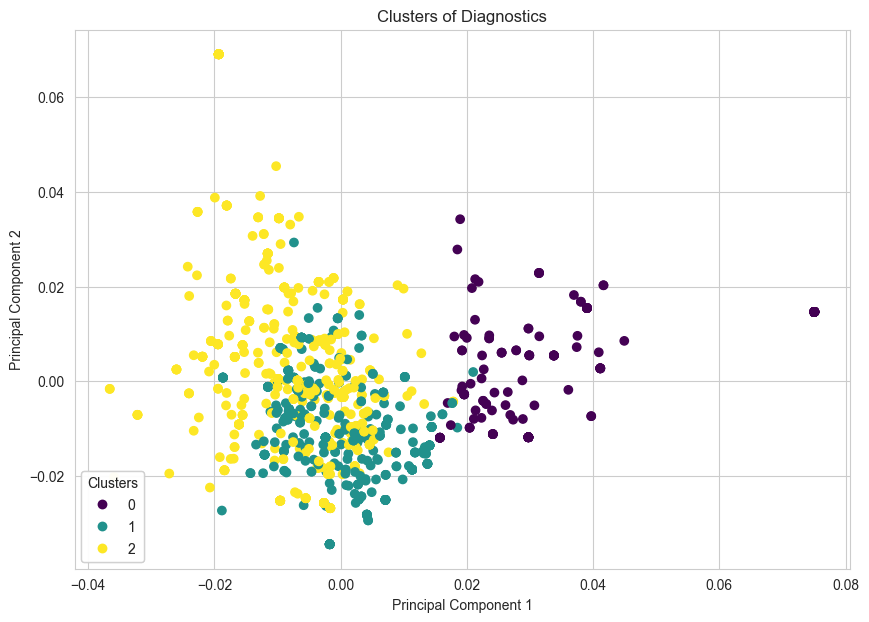

In [67]:
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(df_pca['x'], df_pca['y'], c=df_pca['cluster'], cmap='viridis')
ax.set_title('Clusters of Diagnostics')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# create legend as per color map
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

plt.show()


## 12.2.PCA Max

In [68]:
# Reducir la dimensionalidad de los vectores a 2 dimensiones con PCA:

pca = PCA(n_components=2)
data_vec_2d = pca.fit_transform(data_vec_max)

In [69]:
df_pca_max = pd.DataFrame(data_vec_2d, columns=['x', 'y'])
df_pca_max['cluster'] = labels_max

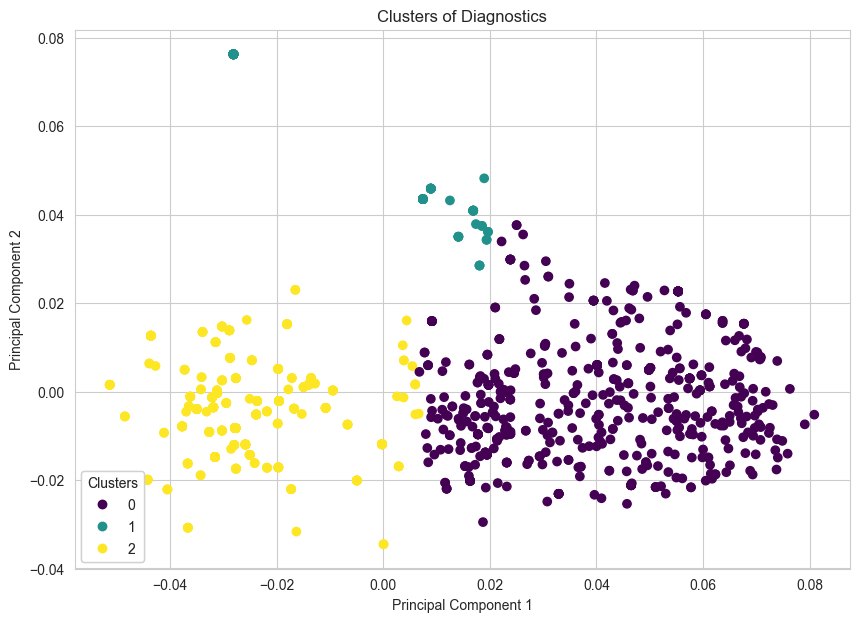

In [70]:
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(df_pca_max['x'], df_pca_max['y'], c=df_pca_max['cluster'], cmap='viridis')
ax.set_title('Clusters of Diagnostics')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# create legend as per color map
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

plt.show()

## 12.3.PCA Sum

In [71]:
# Reducir la dimensionalidad de los vectores a 2 dimensiones con PCA:

pca = PCA(n_components=2)
data_vec_2d = pca.fit_transform(data_vec_sum)

In [72]:
df_pca_sum = pd.DataFrame(data_vec_2d, columns=['x', 'y'])
df_pca_sum['cluster'] = labels_sum

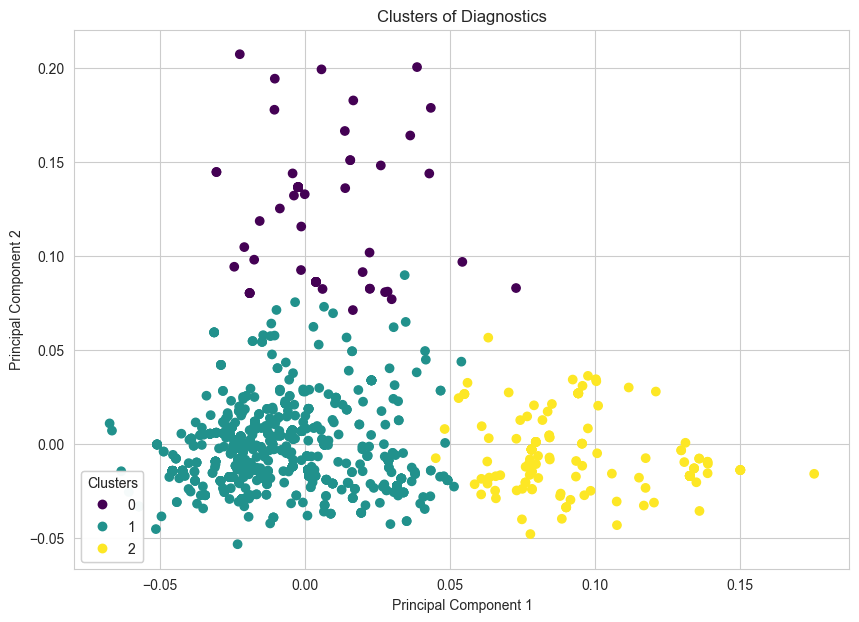

In [73]:
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(df_pca_sum['x'], df_pca_sum['y'], c=df_pca_sum['cluster'], cmap='viridis')
ax.set_title('Clusters of Diagnostics')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# create legend as per color map
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

plt.show()

# Estrategia
Una estrategia a considerar es usar una combinación de estas métricas para obtener una visión más completa de los datos. 
Por ejemplo, usando las métricas: 
1. `mean` para **identificar las palabras que son más representativas de cada cluster en promedio**
2. `max` para **identificar los temas o categorías que son más comunes** en los datos. 
3. `sum` para **obtener una visión general de qué palabras son más prevalentes** en los datos.

# 13.Análisis de grupos: 

Podría realizarse un análisis más profundo de cada grupo. 
Por ejemplo: 
* Examinar las características de los pacientes dentro de cada grupo para ver si hay alguna característica que distinga a los pacientes en un grupo de los pacientes en otro grupo.

In [74]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   h_procedencia               4013 non-null   object
 1   hospital_category           4013 non-null   object
 2   s_procedencia               4013 non-null   object
 3   procedencia_category        4013 non-null   object
 4   diagnostico                 4013 non-null   object
 5   diagnosis_category          4013 non-null   object
 6   motivo_ing                  4013 non-null   object
 7   ingreso_category            4013 non-null   object
 8   motivo_alta                 4013 non-null   object
 9   alta_category               4013 non-null   object
 10  fecha_alta                  4013 non-null   object
 11  ap                          4013 non-null   object
 12  n_estancias                 4013 non-null   int64 
 13  n_visitas                   4013 non-null   int6

In [75]:
# Creamos un DataFrame con las palabras del diagnóstico y su etiqueta de grupo correspondiente
df_clusters = pd.DataFrame({'diagnostico': [' '.join(words) for words in diagnosticos_split], 'cluster': labels})

# Unimos este nuevo DataFrame con el DataFrame original
df_new = df_copy.join(df_clusters.set_index('diagnostico'), on='diagnostico')

In [76]:
df_clusters.head()

diagnostico  cluster
0                 cancer orl        2
1            melanoma vulvar        0
2        cancer broncogenico        2
3          cirrosis hepatica        0
4  neoplasia mama estadio IV        0

In [77]:
df_new.head()

h_procedencia hospital_category s_procedencia procedencia_category  \
0   gil casares          Santiago          upal    Unidad Paliativos   
1       clinico          Santiago     oncologia            Oncologia   
2       clinico          Santiago           mir                  MIR   
3       clinico          Santiago     digestivo            Digestivo   
4       clinico          Santiago     urgencias            Urgencias   

                 diagnostico        diagnosis_category  \
0                 cancer orl     Canceres y neoplasias   
1            melanoma vulvar              Neurologicas   
2        cancer broncogenico     Canceres y neoplasias   
3          cirrosis hepatica  Hepaticas y pancreaticas   
4  neoplasia mama estadio IV     Canceres y neoplasias   

                  motivo_ing ingreso_category   motivo_alta   alta_category  \
0           control sintomas         Sintomas     reingreso  Complicaciones   
1          mal control dolor         Sintomas        exitus          Exitus   
2          control evolutivo     Evaluaciones  fin cuidados           Otros   
3  administracion octreotido            Otros  fin cuidados           Otros   
4           control sintomas         Sintomas        exitus          Exitus   

   ... midazolam buscapina  haloperidol  levomepromazina        medico  \
0  ...         0         0            0                0        valdes   
1  ...         0         0            0                0   galego feal   
2  ...         0         0            0                0  lopez renedo   
3  ...         0         0            0                0  lopez renedo   
4  ...         0         0            0                0  lopez renedo   

  ayuntamiento  year     latitude    longitude cluster  
0  desconocido  2017  desconocido  desconocido     2.0  
1  desconocido  2017  desconocido  desconocido     0.0  
2  desconocido  2017  desconocido  desconocido     2.0  
3  desconocido  2017  desconocido  desconocido     0.0  
4  desconocido  2017  desconocido  desconocido     0.0  

[5 rows x 56 columns]

In [78]:
# Tamaño de los grupos
df_new['cluster'].value_counts()



0.0    3124
2.0     540
1.0     348
Name: cluster, dtype: int64

In [79]:
# Análisis de las características de los pacientes dentro de cada grupo
df_new.groupby('cluster').describe()

n_estancias                                                     \
              count       mean        std  min  25%   50%   75%    max   
cluster                                                                  
0.0          3124.0  15.091229  20.278710  0.0  4.0   9.0  18.0  304.0   
1.0           348.0  11.183908  10.191287  1.0  6.0   8.0  14.0  118.0   
2.0           540.0  16.781481  18.966733  0.0  5.0  10.0  22.0  126.0   

        n_visitas            ... levomepromazina         year               \
            count      mean  ...             75%  max   count         mean   
cluster                      ...                                             
0.0        3124.0  5.848912  ...             0.0  1.0  3124.0  2019.976633   
1.0         348.0  5.005747  ...             0.0  0.0   348.0  2020.031609   
2.0         540.0  7.581481  ...             0.0  1.0   540.0  2019.400000   

                                                           
              std     min     25%     50%     75%     max  
cluster                                                    
0.0      1.764496  2017.0  2018.0  2020.0  2022.0  2022.0  
1.0      1.880165  2017.0  2018.0  2020.0  2022.0  2022.0  
2.0      1.771554  2017.0  2018.0  2019.0  2021.0  2022.0  

[3 rows x 104 columns]

<Axes: xlabel='cluster', ylabel='n_visitas'>

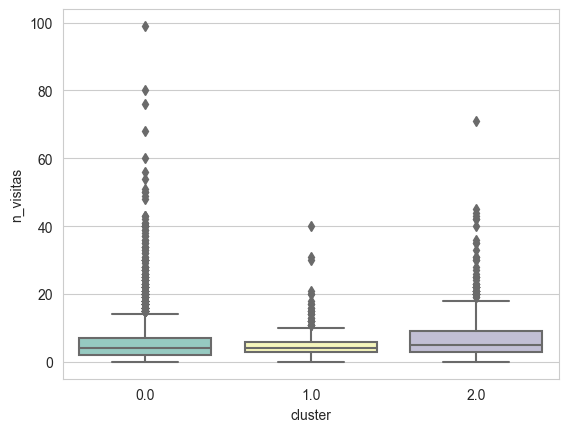

In [80]:
sns.boxplot(x='cluster', y='n_visitas', data=df_new)

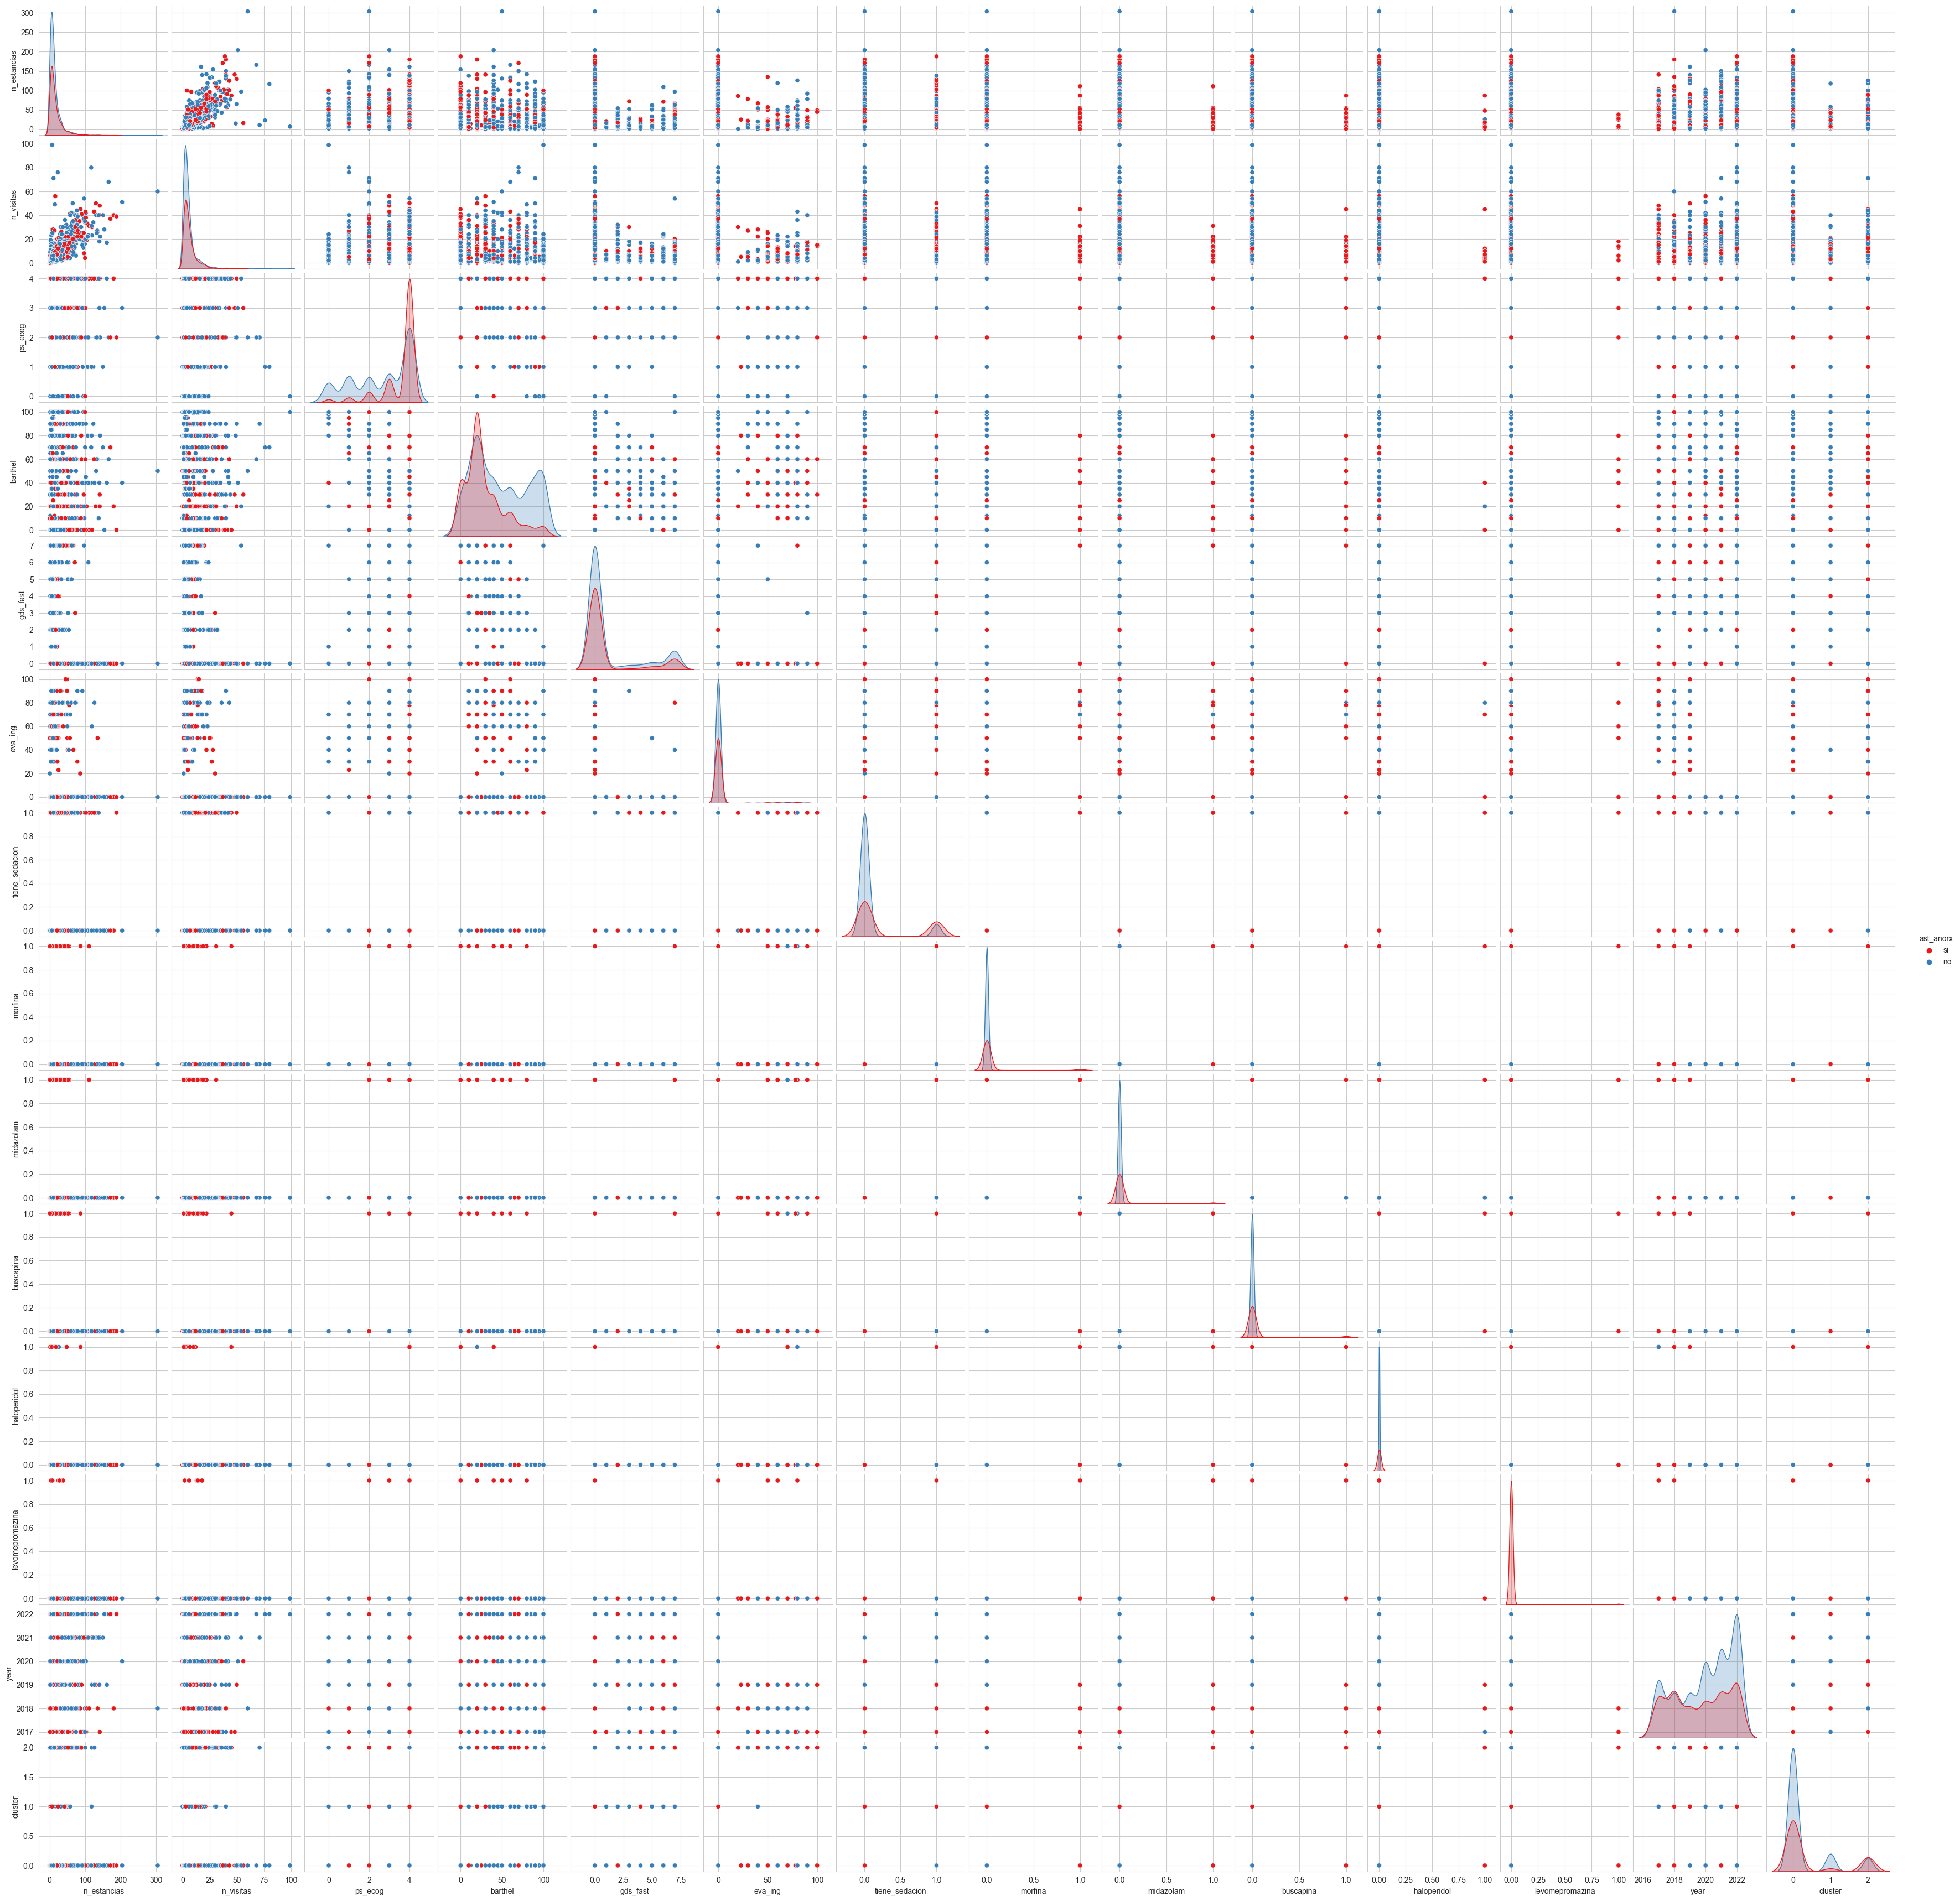

In [81]:
sns.pairplot(data=df_new, hue='ast_anorx', palette='Set1')

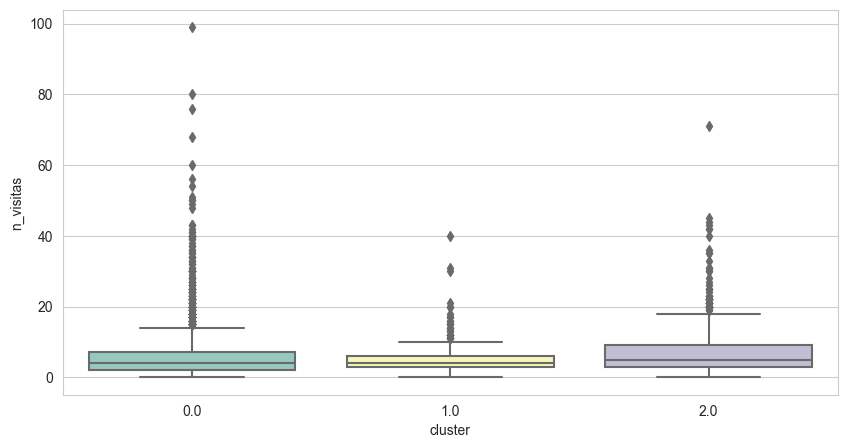

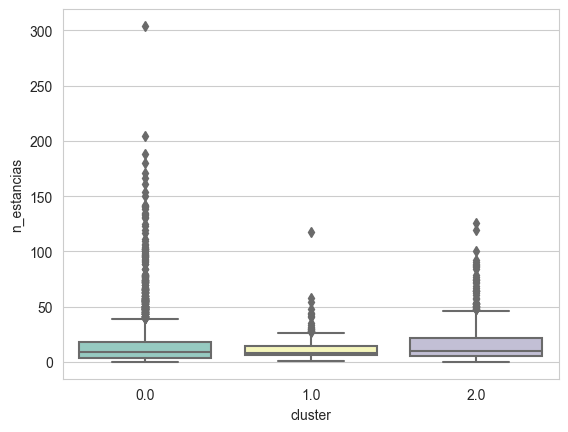

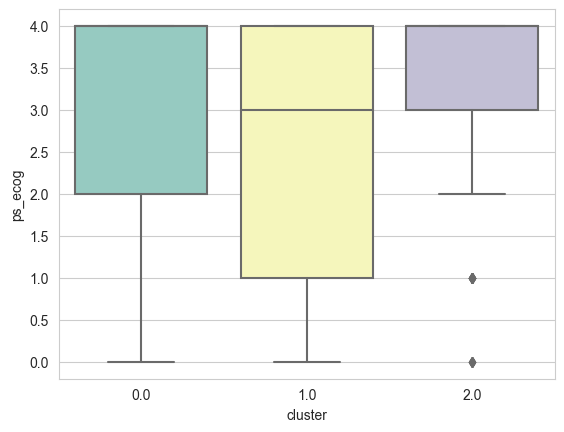

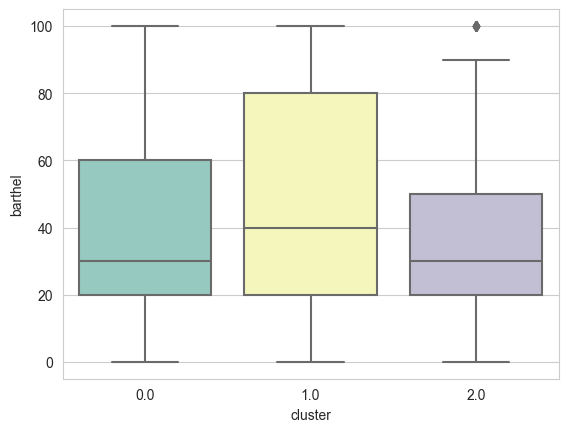

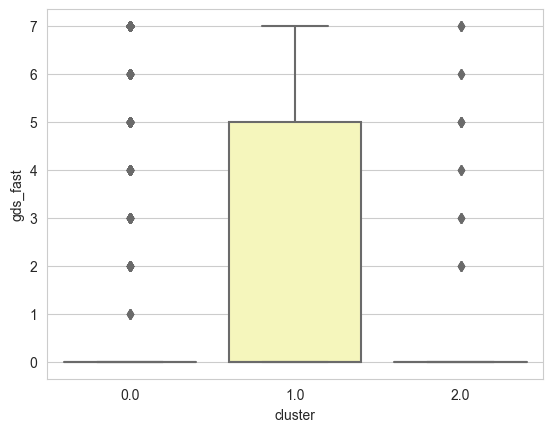

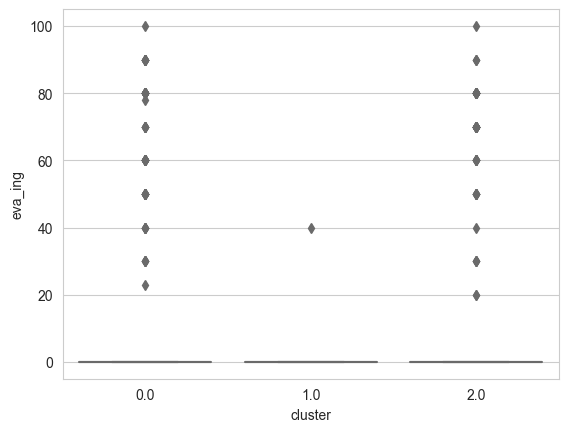

In [82]:
columns_df = ['n_visitas', 'n_estancias', 'ps_ecog', 'barthel', 'gds_fast', 'eva_ing']
f , ax = plt.subplots(figsize=(10, 5))
for col in columns_df:
    ax = sns.boxplot(x='cluster', y=col, data=df_new, orient='v')
    plt.show()

## 13.1.Análisis de la procedencia

In [83]:
print(df_new.groupby('cluster')['h_procedencia'].value_counts())

cluster  h_procedencia       
0.0      clinico                 1690
         no                      1029
         conxo                    264
         gil casares              114
         provincial                 7
         chuac                      5
         residencia                 3
         si                         3
         rosaleda                   2
         ap                         1
         hula                       1
         lucus augusti              1
         pontevedra                 1
         quiron la coruna           1
         salnes                     1
         san rafael la coruna       1
1.0      clinico                  208
         no                        81
         conxo                     35
         gil casares               18
         provincial                 5
         chuac                      1
2.0      clinico                  342
         no                       139
         conxo                     30
         gil casares

In [84]:
print(df_new.groupby('cluster')['s_procedencia'].value_counts())

cluster  s_procedencia        
0.0      no                       1006
         mir                       389
         oncologia                 319
         urgencias                 300
         upal                      158
                                  ... 
2.0      umap                        1
         umapmir                     1
         ume                         1
         urgencias hematologia       1
         urgencias oncologia         1
Name: s_procedencia, Length: 157, dtype: int64


## 13.2.Análisis del motivo de ingreso por cluster

In [85]:
print(df_new.groupby('cluster')['motivo_ing'].value_counts())

cluster  motivo_ing                    
0.0      control sintomas                  859
         tratamiento antibiotico IV        272
         antibioterapia IV                 259
         valoracion                        109
         continuacion cuidados              96
                                          ... 
2.0      ulceras presion                     1
         valoracion ajuste tratamiento       1
         valoracion peg                      1
         valoracion tumoracion cervical      1
         vigilancia postoperatorio           1
Name: motivo_ing, Length: 624, dtype: int64


## 13.3.Análisis de la duración de la estancia (n_estancias) por cluster

In [86]:
print(df_new.groupby('cluster')['n_estancias'].describe())

          count       mean        std  min  25%   50%   75%    max
cluster                                                           
0.0      3124.0  15.091229  20.278710  0.0  4.0   9.0  18.0  304.0
1.0       348.0  11.183908  10.191287  1.0  6.0   8.0  14.0  118.0
2.0       540.0  16.781481  18.966733  0.0  5.0  10.0  22.0  126.0


## 13.4.Análisis del médico asignado (medico) por cluster

In [87]:
print(df_new.groupby('cluster')['medico'].value_counts())

cluster  medico             
0.0      fernandez benito       713
         galego feal            474
         villar del castillo    446
         suarez                 415
         lopez renedo           389
         valdes                 154
         novo                   137
         gomez buela            128
         valcarcel               91
         masa                    67
         beceiro                 58
         ibanez alonso           51
         desconocido              1
1.0      villar del castillo     84
         fernandez benito        60
         lopez renedo            58
         suarez                  45
         galego feal             27
         novo                    27
         ibanez alonso           14
         gomez buela             11
         beceiro                  7
         valdes                   7
         masa                     6
         valcarcel                2
2.0      villar del castillo    197
         suarez                  99

# 14.Análisis de frecuencia 

## 14.1.Por palabra clave en los diagnósticos

In [88]:
print(len(diagnosticos_split), diagnosticos_split)

1452 [['cancer', 'orl'], ['melanoma', 'vulvar'], ['cancer', 'broncogenico'], ['cirrosis', 'hepatica'], ['neoplasia', 'mama', 'estadio', 'IV'], ['anemia'], ['adenoma', 'pulmon'], ['leucemia', 'linfatica', 'cronica'], ['fx', 'meseta', 'tibial'], ['cancer', 'mama'], ['cancer', 'prostata'], ['deterioro', 'general'], ['tumor', 'cerebral'], ['adenoma', 'colon', 'IV'], ['cancer', 'colon'], ['neumonia'], ['niemannpick'], ['sarcoidosis'], ['cancer', 'pancreas'], ['infeccion', 'urinaria', 'fallo', 'cardiaco'], ['melanoma', 'fosa', 'nasal'], ['cancer', 'timo'], ['infeccion', 'respiratoria'], ['sdown'], ['bocio', 'intratoracico'], ['sepsis', 'respiratoria'], ['intolerancia', 'oral'], ['infeccion', 'urinaria'], ['esclerosis', 'multiple'], ['demencia', 'fallo', 'multiorganico'], ['cancer', 'parotida'], ['ITU'], ['ulceras', 'mmii'], ['smd'], ['cancer', 'colon', 'estadio', 'IV'], ['fractura', 'cadera'], ['fallo', 'cardiaco'], ['cancer', 'endometrio'], ['cancer', 'suprarrenal'], ['amputacion'], ['fract

In [89]:
from collections import Counter

# Concatena todas las listas de palabras en una sola lista
all_words = [word for sublist in diagnosticos_split for word in sublist]

# Cuenta la frecuencia de cada palabra
word_freq = Counter(all_words)

# Muestra las 10 palabras más comunes
most_common_words = word_freq.most_common(30)
most_common_words


[
    ('cancer', 196),
    ('IV', 146),
    ('estadio', 137),
    ('infeccion', 103),
    ('insuficiencia', 73),
    ('neoplasia', 63),
    ('cardiaca', 52),
    ('cronica', 50),
    ('colon', 46),
    ('respiratoria', 46),
    ('pulmon', 43),
    ('cognitivo', 41),
    ('ITU', 40),
    ('ulcera', 40),
    ('deterioro', 39),
    ('demencia', 35),
    ('ulceras', 34),
    ('carcinoma', 28),
    ('fragil', 28),
    ('adenocarcinoma', 27),
    ('renal', 26),
    ('recto', 25),
    ('aguda', 24),
    ('epidermoide', 24),
    ('prostata', 23),
    ('urinaria', 23),
    ('epoc', 22),
    ('sindrome', 22),
    ('pancreas', 20),
    ('isquemia', 20)
]

## 14.2.Análisis de n-gramas

In [90]:
from nltk.util import ngrams

# Genera bigramas
bigrams = list(ngrams(all_words, 2))

# Cuenta la frecuencia de cada bigrama
bigram_freq = Counter(bigrams)

# Muestra los 10 bigramas más comunes
most_common_bigrams = bigram_freq.most_common(30)
most_common_bigrams



[
    (('estadio', 'IV'), 121),
    (('insuficiencia', 'cardiaca'), 51),
    (('infeccion', 'respiratoria'), 31),
    (('deterioro', 'cognitivo'), 29),
    (('cardiaca', 'cronica'), 27),
    (('IV', 'cancer'), 24),
    (('cancer', 'colon'), 17),
    (('cancer', 'epidermoide'), 17),
    (('pulmon', 'estadio'), 16),
    (('cognitivo', 'severo'), 16),
    (('infeccion', 'urinaria'), 15),
    (('colon', 'estadio'), 15),
    (('anciana', 'fragil'), 12),
    (('cancer', 'prostata'), 11),
    (('anciano', 'fragil'), 11),
    (('cancer', 'pulmon'), 10),
    (('demencia', 'avanzada'), 10),
    (('insuficiencia', 'renal'), 10),
    (('cancer', 'recto'), 9),
    (('prostata', 'estadio'), 9),
    (('neoplasia', 'colon'), 9),
    (('grado', 'IV'), 9),
    (('cirrosis', 'hepatica'), 8),
    (('cancer', 'gastrico'), 8),
    (('mama', 'estadio'), 7),
    (('IV', 'neoplasia'), 7),
    (('recto', 'estadio'), 7),
    (('pancreas', 'estadio'), 7),
    (('IV', 'infeccion'), 7),
    (('herida', 'quirurgica

In [91]:
# Genera bigramas
trigrams = list(ngrams(all_words, 3))

# Cuenta la frecuencia de cada bigrama
trigram_freq = Counter(trigrams)

# Muestra los 10 bigramas más comunes
most_common_trigrams = trigram_freq.most_common(30)
most_common_trigrams


[
    (('insuficiencia', 'cardiaca', 'cronica'), 27),
    (('estadio', 'IV', 'cancer'), 19),
    (('pulmon', 'estadio', 'IV'), 15),
    (('colon', 'estadio', 'IV'), 13),
    (('deterioro', 'cognitivo', 'severo'), 11),
    (('prostata', 'estadio', 'IV'), 9),
    (('cancer', 'colon', 'estadio'), 7),
    (('estadio', 'IV', 'neoplasia'), 7),
    (('recto', 'estadio', 'IV'), 7),
    (('estadio', 'IV', 'infeccion'), 7),
    (('mama', 'estadio', 'IV'), 6),
    (('pancreas', 'estadio', 'IV'), 6),
    (('estadio', 'IV', 'adenocarcinoma'), 4),
    (('estadio', 'IV', 'demencia'), 4),
    (('insuficiencia', 'cardiaca', 'infeccion'), 4),
    (('obliteracion', 'femoro', 'poplitea'), 4),
    (('infeccion', 'respiratoria', 'insuficiencia'), 4),
    (('respiratoria', 'insuficiencia', 'cardiaca'), 4),
    (('infeccion', 'herida', 'quirurgica'), 3),
    (('estadio', 'IV', 'neo'), 3),
    (('ovario', 'estadio', 'IV'), 3),
    (('gastrico', 'estadio', 'IV'), 3),
    (('renal', 'estadio', 'IV'), 3),
    ((

Estos análisis nos permiten ver cuáles son los diagnósticos más comunes entre los pacientes

# 15.Análisis de tendencias a lo largo del tiempo

## 15.1.Agrupación por año y diagnóstico

In [92]:
df_new.groupby(['year', 'diagnostico']).count()

h_procedencia  hospital_category  \
year diagnostico                                                          
2017 ITU                                          13                 13   
     ITU asintomatica                              1                  1   
     ITU hepatopatia cronica                       1                  1   
     ITU klebsiella                                1                  1   
     ITU klebsiella transplante renal              1                  1   
...                                              ...                ...   
2022 ulceras presion extensas                      1                  1   
     ulceras vasculares                            1                  1   
     upp sacra                                     2                  2   
     ventilacion mecanica invasiva                 1                  1   
     vmi insuficiencia respiratoria                1                  1   

                                       s_procedencia  procedencia_category  \
year diagnostico                                                             
2017 ITU                                          13                    13   
     ITU asintomatica                              1                     1   
     ITU hepatopatia cronica                       1                     1   
     ITU klebsiella                                1                     1   
     ITU klebsiella transplante renal              1                     1   
...                                              ...                   ...   
2022 ulceras presion extensas                      1                     1   
     ulceras vasculares                            1                     1   
     upp sacra                                     2                     2   
     ventilacion mecanica invasiva                 1                     1   
     vmi insuficiencia respiratoria                1                     1   

                                       diagnosis_category  motivo_ing  \
year diagnostico                                                        
2017 ITU                                               13          13   
     ITU asintomatica                                   1           1   
     ITU hepatopatia cronica                            1           1   
     ITU klebsiella                                     1           1   
     ITU klebsiella transplante renal                   1           1   
...                                                   ...         ...   
2022 ulceras presion extensas                           1           1   
     ulceras vasculares                                 1           1   
     upp sacra                                          2           2   
     ventilacion mecanica invasiva                      1           1   
     vmi insuficiencia respiratoria                     1           1   

                                       ingreso_category  motivo_alta  \
year diagnostico                                                       
2017 ITU                                             13           13   
     ITU asintomatica                                 1            1   
     ITU hepatopatia cronica                          1            1   
     ITU klebsiella                                   1            1   
     ITU klebsiella transplante renal                 1            1   
...                                                 ...          ...   
2022 ulceras presion extensas                         1            1   
     ulceras vasculares                               1            1   
     upp sacra                                        2            2   
     ventilacion mecanica invasiva                    1            1   
     vmi insuficiencia respiratoria                   1            1   

                                       alta_category  fecha_alta  ...  \
year diagnostico                                                  ...   
2017 ITU       

In [93]:
diagnostic_counts = df_new.groupby(['year', 'diagnostico']).size()
print(diagnostic_counts.info(),"\n", diagnostic_counts.sort_values(ascending=False),"\n")
# print(df_new.groupby(['year', 'diagnostico']).size().sort_values(ascending=False),"\n")

<class 'pandas.core.series.Series'>
MultiIndex: 1944 entries, (2017, 'ITU') to (2022, 'vmi insuficiencia respiratoria')
Series name: None
Non-Null Count  Dtype
--------------  -----
1944 non-null   int64
dtypes: int64(1)
memory usage: 32.4+ KB
None 
 year  diagnostico                   
2022  ITU                               67
      infeccion respiratoria            50
      insuficiencia cardiaca cronica    47
      infeccion urinaria                43
2020  ITU                               40
                                        ..
2019  sindrome anciano fragil            1
      sind hallerman sterif              1
      shock septico                      1
      sepsis urinaria                    1
2022  vmi insuficiencia respiratoria     1
Length: 1944, dtype: int64 



## 15.2.Visualización de las tendencias

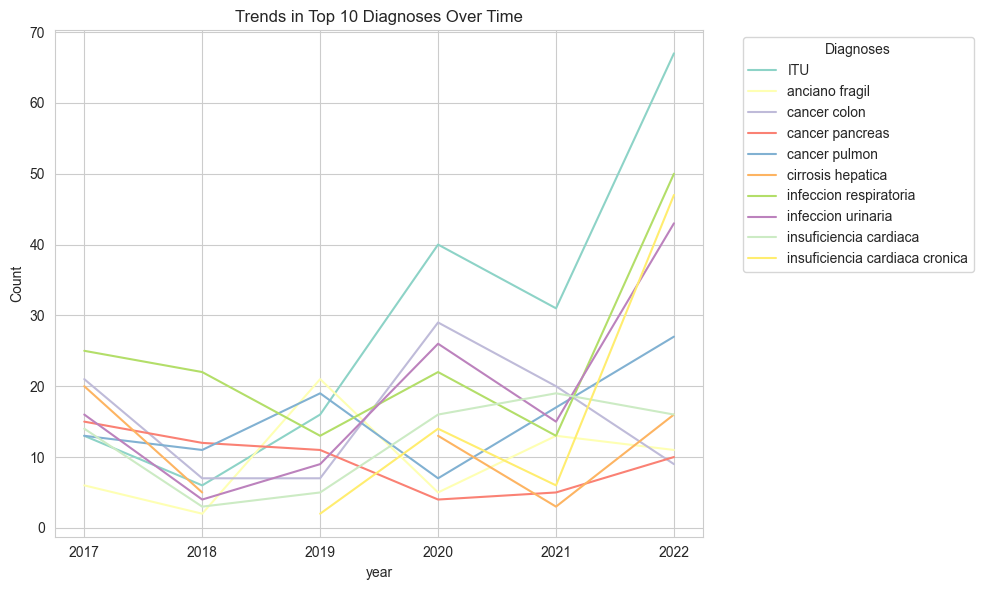

In [96]:
top_diagnoses = diagnostic_counts.groupby(level='diagnostico').sum().nlargest(10).index

filtered_counts = diagnostic_counts[diagnostic_counts.index.get_level_values('diagnostico').isin(top_diagnoses)]

filtered_counts.unstack('diagnostico').plot(kind='line', figsize=(10, 6))
plt.ylabel('Count')
plt.title('Trends in Top 10 Diagnoses Over Time')
plt.legend(title='Diagnoses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Observamos los 10 diagnósticos con mayor frecuencia en los datos.


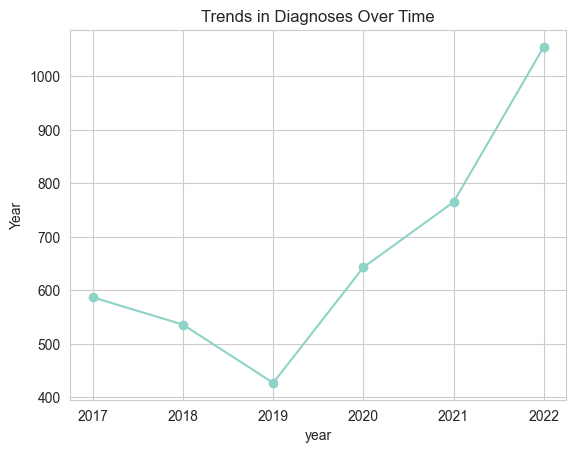

In [97]:
year_counts = df_new.groupby('year').size()
year_counts.plot(kind='line', marker="o")
plt.ylabel('Count')
plt.ylabel('Year')
plt.title('Trends in Diagnoses Over Time')
plt.show()

Al tener muchos diagnósticos distintos clasificaremos por los grupos de palabras más frecuentes en los diagnósticos

## 15.3.Top palabras mas comunes y bigramas

In [98]:
# lista de palabras o bigramas a seguir
common_words = ['cancer', 'ulcera', 'respiratorio', 'infeccion', 'insuficiencia']  
common_bigrams = [('estadio', 'IV'), ('insuficiencia', 'cardiaca'), ('(infeccion', 'tracto')]


In [99]:
#  nueva columna para las palabras o bigramas comunes

def match_word(x, words):
    for word in words:
        if word in x:
            return word
    return None

def match_bigram(x, bigrams):
    words = x.split()
    for i in range(len(words) - 1):
        if (words[i], words[i+1]) in bigrams:
            return (words[i], words[i+1])
    return None

df_new['common_word'] = df_new['diagnostico'].apply(lambda x: match_word(x, common_words))
df_new['common_bigram'] = df_new['diagnostico'].apply(lambda x: match_bigram(x, common_bigrams))


In [100]:
pd.get_dummies(df_new, columns=['common_word', 'common_bigram'])

h_procedencia hospital_category s_procedencia procedencia_category  \
0      gil casares          Santiago          upal    Unidad Paliativos   
1          clinico          Santiago     oncologia            Oncologia   
2          clinico          Santiago           mir                  MIR   
3          clinico          Santiago     digestivo            Digestivo   
4          clinico          Santiago     urgencias            Urgencias   
...            ...               ...           ...                  ...   
4008       clinico          Santiago     oncologia            Oncologia   
4009       clinico          Santiago           mir                  MIR   
4010       clinico          Santiago           mir                  MIR   
4011       clinico          Santiago     urgencias            Urgencias   
4012       clinico          Santiago     oncologia            Oncologia   

                    diagnostico        diagnosis_category  \
0                    cancer orl     Canceres y neoplasias   
1               melanoma vulvar              Neurologicas   
2           cancer broncogenico     Canceres y neoplasias   
3             cirrosis hepatica  Hepaticas y pancreaticas   
4     neoplasia mama estadio IV     Canceres y neoplasias   
...                         ...                       ...   
4008     cancer mama estadio IV     Canceres y neoplasias   
4009             anciano fragil                     Otros   
4010        oclusion intestinal                     Otros   
4011                        ITU                     Otros   
4012               glioblastoma              Neurologicas   

                         motivo_ing ingreso_category     motivo_alta  \
0                  control sintomas         Sintomas       reingreso   
1                 mal control dolor         Sintomas          exitus   
2                 control evolutivo     Evaluaciones    fin cuidados   
3         administracion octreotido            Otros    fin cuidados   
4                  control sintomas         Sintomas          exitus   
...                             ...              ...             ...   
4008               control sintomas         Sintomas          exitus   
4009                    seguimiento     Evaluaciones          exitus   
4010  cuidados paliativos avanzados            Otros  paso urgencias   
4011              antibioterapia IV     Tratamientos          exitus   
4012               control sintomas         Sintomas          exitus   

       alta_category  ...     latitude    longitude  cluster  \
0     Complicaciones  ...  desconocido  desconocido      2.0   
1             Exitus  ...  desconocido  desconocido      0.0   
2              Otros  ...  desconocido  desconocido      2.0   
3              Otros  ...  desconocido  desconocido      0.0   
4             Exitus  ...  desconocido  desconocido      0.0   
...              ...  ...          ...          ...      ...   
4008          Exitus  ...   42.7171503   -8.6630965      0.0   
4009          Exitus  ...   42.7005922   -8.2560419      0.0   
4010           Otros  ...   42.6488057   -8.8185183      0.0   
4011          Exitus  ...   42.7841408   -8.8991033      0.0   
4012          Exitus  ...   42.8802346   -8.5653691      0.0   

      common_word_cancer common_word_infeccion common_word_insuficiencia  \
0                      1                     0                         0   
1                      0                     0                         0   
2                      1                     0                         0   
3                      0                     0                         0   
4                      0                     0                         0   
...                  ...                   ...                       ...   
4008                   1                     0                         0   
4009                   0                     0                         0   
4010                   0                     0       

## 15.4.One-hot encoding de las nuevas columnas

In [101]:
# One-hot encoding de las nuevas columnas

df_new = pd.get_dummies(df_new, columns=['common_word', 'common_bigram'])


In [102]:
# Agrupo por año y sumo las columnas
word_counts = df_new.filter(regex='common_word').groupby(df_new['year']).sum()
bigram_counts = df_new.filter(regex='common_bigram').groupby(df_new['year']).sum()
print(word_counts)
print(bigram_counts)

      common_word_cancer  common_word_infeccion  common_word_insuficiencia  \
year                                                                         
2017                 145                     59                         17   
2018                 141                     45                         24   
2019                 115                     30                         18   
2020                 127                     58                         43   
2021                 142                     61                         44   
2022                 137                    135                         74   

      common_word_respiratorio  common_word_ulcera  
year                                                
2017                         0                  20  
2018                         1                   7  
2019                         0                  12  
2020                         0                  27  
2021                         0                  35  
2022

## 15.5.Visualización de las tendencias

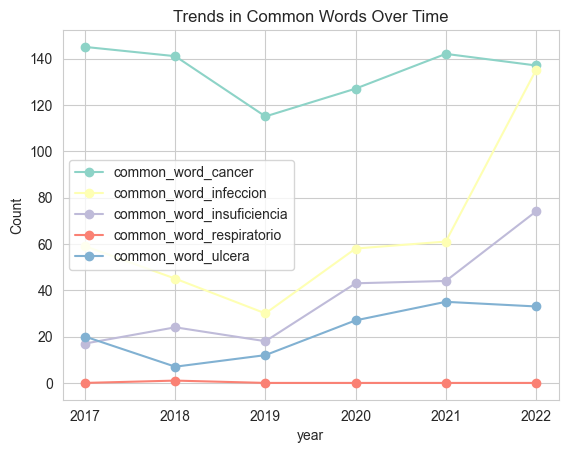

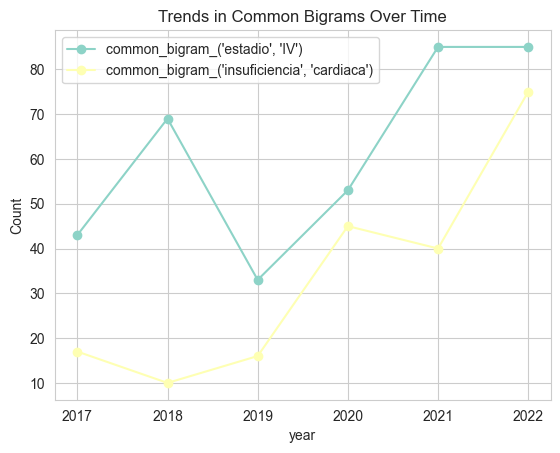

In [103]:
word_counts.plot(kind='line', marker="o")
plt.ylabel('Count')
plt.title('Trends in Common Words Over Time')
plt.show()

bigram_counts.plot(kind='line', marker="o")
plt.ylabel('Count')
plt.title('Trends in Common Bigrams Over Time')
plt.show()


# Otros...

* Análisis de grupos: Podrías realizar un análisis más profundo de cada grupo. Por ejemplo, podrías examinar las características de los pacientes dentro de cada grupo para ver si hay alguna característica que distinga a los pacientes en un grupo de los pacientes en otro grupo.

* Análisis de tendencias a lo largo del tiempo: Si tienes datos de tiempo, podrías examinar cómo han cambiado los diagnósticos a lo largo del tiempo. ¿Han aumentado o disminuido ciertos diagnósticos? ¿Ha habido cambios en los grupos de diagnósticos a lo largo del tiempo?

* Predecir diagnósticos: Si tienes un objetivo específico, como predecir un cierto diagnóstico basándote en las características de un paciente, podrías entrenar un modelo de aprendizaje automático supervisado utilizando tus vectores de diagnósticos como entrada.

* Análisis de sentimiento: Si tus diagnósticos incluyen texto escrito por médicos o pacientes, podrías considerar realizar un análisis de sentimiento para entender mejor cómo se sienten los pacientes o cómo perciben su condición.

* Pruebas de correlación: Podrías realizar pruebas de correlación entre diferentes variables para ver si hay alguna relación entre, por ejemplo, la edad de un paciente y el tipo de diagnóstico que recibe.

Preprocesamiento de los datos:
    
    Codificación de Frecuencias: En este método, reemplazas cada categoría de la variable por la frecuencia con la que aparece en el conjunto de datos. Por ejemplo, si la categoría 'resfriado común' aparece 100 veces en la variable 'diagnóstico', entonces reemplazas 'resfriado común' por 100. Aquí te dejo un ejemplo de cómo hacerlo con pandas:

In [104]:
df_freq = df.copy()
df_freq.head()

h_procedencia hospital_category s_procedencia procedencia_category  \
0   gil casares          Santiago          upal    Unidad Paliativos   
1       clinico          Santiago     oncologia            Oncologia   
2       clinico          Santiago           mir                  MIR   
3       clinico          Santiago     digestivo            Digestivo   
4       clinico          Santiago     urgencias            Urgencias   

                 diagnostico        diagnosis_category  \
0                 cancer orl     Canceres y neoplasias   
1            melanoma vulvar              Neurologicas   
2        cancer broncogenico     Canceres y neoplasias   
3          cirrosis hepatica  Hepaticas y pancreaticas   
4  neoplasia mama estadio IV     Canceres y neoplasias   

                  motivo_ing ingreso_category   motivo_alta   alta_category  \
0           control sintomas         Sintomas     reingreso  Complicaciones   
1          mal control dolor         Sintomas        exitus          Exitus   
2          control evolutivo     Evaluaciones  fin cuidados           Otros   
3  administracion octreotido            Otros  fin cuidados           Otros   
4           control sintomas         Sintomas        exitus          Exitus   

   ... morfina midazolam  buscapina  haloperidol levomepromazina  \
0  ...       0         0          0            0               0   
1  ...       0         0          0            0               0   
2  ...       0         0          0            0               0   
3  ...       0         0          0            0               0   
4  ...       0         0          0            0               0   

         medico ayuntamiento  year     latitude    longitude  
0        valdes  desconocido  2017  desconocido  desconocido  
1   galego feal  desconocido  2017  desconocido  desconocido  
2  lopez renedo  desconocido  2017  desconocido  desconocido  
3  lopez renedo  desconocido  2017  desconocido  desconocido  
4  lopez renedo  desconocido  2017  desconocido  desconocido  

[5 rows x 55 columns]

In [105]:
# Creas un mapeo de frecuencias
freq_map = df_freq['diagnostico'].value_counts().to_dict()

# Aplicas el mapeo a la columna 'diagnostico'
df_freq['diagnostico'] = df_freq['diagnostico'].map(freq_map)


In [106]:
print(len(df_freq['diagnostico'].unique()), 
      "\n\n",
      df_freq['diagnostico'].unique())

39 

 [  7   1   4  57   5  28   2  27  33  93  54 145   3 113  15 173   8   9
  21  11  13  16  94  44  17  73  24  39  58   6  23  18  10  14  30  12
  42  22  69]


Codificación de Target

In [110]:

X = df_freq.select_dtypes(exclude='object')
y = df_freq['diagnostico']
# Asegúrate de dividir tus datos en conjuntos de entrenamiento y prueba primero
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica la codificación al conjunto de entrenamiento
target_enc = ce.TargetEncoder(cols=['diagnostico']).fit(X_train, y_train)

# Transforma tus conjuntos de datos
X_train = target_enc.transform(X_train)
X_test = target_enc.transform(X_test)

Paso 2: Selección de Características

Una vez que hayas convertido estas variables a formatos numéricos, puedes utilizar todas las demás variables como características para predecir la variable 'diagnostico'. También puedes realizar una selección de características para determinar cuáles son las más importantes para tu modelo.

* **Eliminación Recursiva de Características (RFE)**: RFE es una técnica que elimina las características una por una, basándose en la importancia de las características calculada por un modelo específico.
````python
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# define el método de selección de características
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

# ajusta y aplica la transformación
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

````
* **Importancia de la característica basada en el modelo**: Algunos modelos de Machine Learning ofrecen una forma de clasificar las características por importancia.
````python
from sklearn.ensemble import RandomForestClassifier

# define el modelo
model = RandomForestClassifier()

# entrena el modelo
model.fit(X_train, y_train)

# obtén la importancia de las características
importance = model.feature_importances_

# resume la importancia de las características
for i,j in enumerate(importance):
    print('Característica: %0d, Puntuación: %.5f' % (i,j))
````

* **Correlación de Pearson**: La correlación de Pearson mide la dependencia lineal entre dos variables. Podemos usarla para seleccionar las características más correlacionadas con la variable objetivo.

````python
# calcula la correlación de Pearson de las características con la variable objetivo
correlations = df.corrwith(df['diagnostico']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()

# imprime las características más correlacionadas
top_features = correlations.sort_values('abs', ascending=False)[0]
print(top_features)
````


Paso 3: Creación y Entrenamiento del Modelo

Como mencioné anteriormente, puedes probar varios modelos como el árbol de decisión, bosque aleatorio, SVM, KNN y la regresión logística multiclase. Aquí te dejo un ejemplo de cómo hacerlo con un modelo de bosque aleatorio:

In [111]:
from sklearn.ensemble import RandomForestClassifier

# Crea el modelo
model = RandomForestClassifier()

# Entrena el modelo
model.fit(X_train, y_train)

RandomForestClassifier()

Paso 4: Evaluación del Modelo

Para evaluar tu modelo, puedes utilizar la precisión, recall, F1-score, ROC-AUC, etc. También puedes utilizar una matriz de confusión para ver cómo se comporta tu modelo en cada una de las clases:

In [112]:
from sklearn.metrics import classification_report

# Haz predicciones en tu conjunto de prueba
y_pred = model.predict(X_test)

# Imprime el informe de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       228
           2       0.91      1.00      0.95        53
           3       0.78      0.66      0.71        32
           4       0.67      0.67      0.67        30
           5       0.73      0.67      0.70        33
           6       0.14      0.08      0.10        13
           7       0.40      0.22      0.29        18
           8       0.28      0.37      0.32        19
           9       0.31      0.57      0.40         7
          10       0.33      0.20      0.25        10
          11       0.38      0.27      0.32        11
          12       0.50      0.25      0.33         4
          13       0.25      0.26      0.26        19
          14       0.25      0.20      0.22         5
          15       0.25      0.40      0.31         5
          16       0.28      0.50      0.36        10
          17       0.33      0.43      0.38        14
          18       0.00    